## Extracting specific attack intervals

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os



# our capture JSON data snippet as provided
attacks_json = {
    "correlated_signal_attack_1_masquerade": {
        "description": "start from driving; accelerate; start injecting; car rolls to stop; stop injecting; accelerate",
        "elapsed_sec": 33.101852,
        "injection_data_str": "595945450000FFFF",
        "injection_id": "0x6e0",
        "injection_interval": [9.191851, 30.050109],
        "modified": True,
        "on_dyno": True
    },
    "correlated_signal_attack_2_masquerade": {
        "description": "start from driving; accelerate; start injecting through end of capture; car rolls to stop",
        "elapsed_sec": 28.226893,
        "injection_data_str": "595945450000FFFF",
        "injection_id": "0x6e0",
        "injection_interval": [6.830477, 28.225908],
        "modified": True,
        "on_dyno": True
    },
    "correlated_signal_attack_3_masquerade": {
        "description": "start from driving; accelerate; start injecting through end of capture; car rolls to near stop",
        "elapsed_sec": 16.963905,
        "injection_data_str": "595945450000FFFF",
        "injection_id": "0x6e0",
        "injection_interval": [4.318482, 16.95706],
        "modified": True,
        "on_dyno": True
    },
    "max_engine_coolant_temp_attack_masquerade": {
        "description": "start from drive/idle; drive; accelerate; decelerate; accelerate; start injecting; engine temp too hot light comes on, stop injecting",
        "elapsed_sec": 25.875548,
        "injection_data_str": "XXXXXXXXXXFFXXXX",
        "injection_id": "0x4e7",
        "injection_interval": [19.979078, 24.170183],
        "modified": True,
        "on_dyno": True
    },
    "max_speedometer_attack_1_masquerade": {
        "description": "start from park; drive; accelerate; start injecting; speedometer jumps to maximum, stop injecting; decelerate; park",
        "elapsed_sec": 88.021577,
        "injection_data_str": "XXXXXXXXXXFFXXXX",
        "injection_id": "0xd0",
        "injection_interval": [42.009204, 66.449011],
        "modified": True,
        "on_dyno": True
    },
    "max_speedometer_attack_2_masquerade": {
        "description": "start from driving; accelerate; start injecting; speedometer jumps to maximum, decelerate, stop injecting; accelerate; decelerate; park",
        "elapsed_sec": 59.696973,
        "injection_data_str": "XXXXXXXXXXFFXXXX",
        "injection_id": "0xd0",
        "injection_interval": [16.009225, 47.408246],
        "modified": True,
        "on_dyno": True
    },
    "max_speedometer_attack_3_masquerade": {
        "description": "start from driving; start injecting; speedometer jumps to maximum, accelerate; decelerate; coast; stop injecting; decelerate; park",
        "elapsed_sec": 86.766667,
        "injection_data_str": "XXXXXXXXXXFFXXXX",
        "injection_id": "0xd0",
        "injection_interval": [9.516489, 70.587285],
        "modified": True,
        "on_dyno": True
    },
    "reverse_light_off_attack_1_masquerade": {
        "description": "start from park; reverse; reverse lights turn on; accelerate; coast; start injecting; reverse lights turn off, stop injecting; reverse lights turn on",
        "elapsed_sec": 28.109869,
        "injection_data_str": "XXXX04XXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [16.627923, 23.347311],
        "modified": True,
        "on_dyno": True
    },
    "reverse_light_off_attack_2_masquerade": {
        "description": "start from park; reverse; reverse lights turn on; accelerate; coast; start injecting; reverse lights turn off, stop injecting; reverse lights turn on",
        "elapsed_sec": 40.665296,
        "injection_data_str": "XXXX04XXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [13.168608, 36.87663],
        "modified": True,
        "on_dyno": True
    },
    "reverse_light_off_attack_3_masquerade": {
        "description": "start from park; reverse; reverse lights turn on; accelerate; coast; start injecting; reverse lights turn off, stop injecting; reverse lights turn on; decelerate; park; reverse lights turn off",
        "elapsed_sec": 57.884882,
        "injection_data_str": "XXXX04XXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [16.524085, 40.862015],
        "modified": True,
        "on_dyno": True
    },
    "reverse_light_on_attack_1_masquerade": {
        "description": "start from park; drive (reverse lights turn on fleetingly when shifting through R); accelerate; start injecting; reverse lights turn on, coast; stop injecting; reverse lights turn off; decelerate; park (reverse lights turn on fleetingly when shifting through R)",
        "elapsed_sec": 54.850207,
        "injection_data_str": "XXXX0CXXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [18.929177, 38.836015],
        "modified": True,
        "on_dyno": True
    },
    "reverse_light_on_attack_2_masquerade": {
        "description": "start from park; drive (reverse lights turn on fleetingly when shifting through R); accelerate; start injecting; reverse lights turn on, accelerate/decelerate/coast; stop injecting; reverse lights turn off; decelerate; park (reverse lights turn on fleetingly when shifting through R)",
        "elapsed_sec": 72.020905,
        "injection_data_str": "XXXX0CXXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [20.407134, 57.297253],
        "modified": True,
        "on_dyno": True
    },
    "reverse_light_on_attack_3_masquerade": {
        "description": "start from park; drive (reverse lights turn on fleetingly when shifting through R); accelerate; start injecting; reverse lights turn on, coast; stop injecting; reverse lights turn off; decelerate; park (reverse lights turn on fleetingly when shifting through R)",
        "elapsed_sec": 64.258771,
        "injection_data_str": "XXXX0CXXXXXXXXXX",
        "injection_id": "0xd0",
        "injection_interval": [23.070278, 46.580686],
        "modified": False,
        "on_dyno": True
    }
}



# Iterate through each attack and print details
for attack_name, attack_details in attacks_json.items():
    elapsed_sec = attack_details["elapsed_sec"]
    injection_interval = attack_details["injection_interval"]
    print(f"{attack_name}:")
    print(f"  Caapture Duration: {elapsed_sec} seconds")
    print(f"  Injection Interval: {injection_interval}\n")

# Define combinations of window sizes and offsets 
combinations = [
    (window_size, offset)
    for window_size in range(2, 16)
    for offset in range(1, window_size + 1)
]



correlated_signal_attack_1_masquerade:
  Caapture Duration: 33.101852 seconds
  Injection Interval: [9.191851, 30.050109]

correlated_signal_attack_2_masquerade:
  Caapture Duration: 28.226893 seconds
  Injection Interval: [6.830477, 28.225908]

correlated_signal_attack_3_masquerade:
  Caapture Duration: 16.963905 seconds
  Injection Interval: [4.318482, 16.95706]

max_engine_coolant_temp_attack_masquerade:
  Caapture Duration: 25.875548 seconds
  Injection Interval: [19.979078, 24.170183]

max_speedometer_attack_1_masquerade:
  Caapture Duration: 88.021577 seconds
  Injection Interval: [42.009204, 66.449011]

max_speedometer_attack_2_masquerade:
  Caapture Duration: 59.696973 seconds
  Injection Interval: [16.009225, 47.408246]

max_speedometer_attack_3_masquerade:
  Caapture Duration: 86.766667 seconds
  Injection Interval: [9.516489, 70.587285]

reverse_light_off_attack_1_masquerade:
  Caapture Duration: 28.109869 seconds
  Injection Interval: [16.627923, 23.347311]

reverse_light_o

Example:

Imagine an attack between seconds 5 and 7. Let's consider two scenarios:

 Window Size = 3 ,Offset = 2: Windows will be generated: [0, 3], [2, 5], [4, 7], [6, 9]. 

The [4, 7] window would be marked "red".

 Window Size = 3,Offset = 1: Windows will be generated: [0, 3], [1, 4], [2, 5], [3, 6]... 
 
Several windows in this case would register "red".

In [3]:
####The check_overlap function receives the calculated window_start and window_end for each window iteration.  
### Essentially, the calculate_and_display_proportions function uses the offset to determine where 
## each window is positioned in time, and then check_overlap decides if that specific window has an overlap.

####The offset parameter is crucial in the calculate_and_display_proportions function.
##Determining Total Windows: total_windows = int(np.ceil(attack_duration / offset))
##Iterating Windows: The for window_index in range(total_windows): loop steps through windows.
##Calculating Window Boundaries:
##window_start = window_index * offset
##window_end = window_start + window_size

##The check_overlap here in our case is concerned with the specifics of 1 window.
## The offset controls the positioning and generation of these windows across the full capture, 
## ensuring that the analysis checks different segments of time.


def check_overlap(window_start, window_end, attack_intervals):
    """Checks if a given window overlaps with any of the attack intervals."""
    for attack_start, attack_end in attack_intervals:
        if window_start <= attack_end and window_end >= attack_start:  # Any overlap
            return "red"  # Mark the window as red
    return "not-red"





def calculate_and_display_proportions(attacks_json, combinations):
    """Calculate proportions, print results, and store for visualization."""
    all_results = {}
    for attack_name, attack_details in attacks_json.items():
        print(f"\n{attack_name} (Duration: {attack_details['elapsed_sec']} seconds):")
        results = []
        attack_duration = attack_details["elapsed_sec"]
        attack_intervals = [attack_details["injection_interval"]]

        for window_size, offset in combinations:
            total_windows = int(np.ceil(attack_duration / offset))
            total_red_windows = 0

            for window_index in range(total_windows):
                window_start = window_index * offset
                window_end = window_start + window_size
                if window_end > attack_duration:
                    break

                window_status = check_overlap(window_start, window_end, attack_intervals)
                if window_status == "red":
                    total_red_windows += 1

            proportion_red = total_red_windows / total_windows

            results.append({'Window Size': window_size, 'Offset': offset, 'Proportion of Red Windows': proportion_red})
            print(f"Window Size: {window_size}, Offset: {offset}, Proportion of Red Windows: {proportion_red:.4f}")

        all_results[attack_name] = results
    return all_results

def calculate_overlay_fraction(window_start, window_end, attack_intervals):
    """Calculates overlap as a fraction of a second if only a partial overlap occurs."""
    for attack_start, attack_end in attack_intervals:
        overlay_start = max(window_start, attack_start)
        overlay_end = min(window_end, attack_end)
        if overlay_start <= overlay_end:
            overlay_duration = overlay_end - overlay_start
            return overlay_duration / 1.0
    return 0
all_results = calculate_and_display_proportions(attacks_json, combinations)




correlated_signal_attack_1_masquerade (Duration: 33.101852 seconds):
Window Size: 2, Offset: 1, Proportion of Red Windows: 0.6765
Window Size: 2, Offset: 2, Proportion of Red Windows: 0.7059
Window Size: 3, Offset: 1, Proportion of Red Windows: 0.7059
Window Size: 3, Offset: 2, Proportion of Red Windows: 0.7059
Window Size: 3, Offset: 3, Proportion of Red Windows: 0.6667
Window Size: 4, Offset: 1, Proportion of Red Windows: 0.7059
Window Size: 4, Offset: 2, Proportion of Red Windows: 0.7059
Window Size: 4, Offset: 3, Proportion of Red Windows: 0.6667
Window Size: 4, Offset: 4, Proportion of Red Windows: 0.6667
Window Size: 5, Offset: 1, Proportion of Red Windows: 0.7059
Window Size: 5, Offset: 2, Proportion of Red Windows: 0.7059
Window Size: 5, Offset: 3, Proportion of Red Windows: 0.6667
Window Size: 5, Offset: 4, Proportion of Red Windows: 0.6667
Window Size: 5, Offset: 5, Proportion of Red Windows: 0.7143
Window Size: 6, Offset: 1, Proportion of Red Windows: 0.7059
Window Size: 6,

In [4]:
def create_heatmap_for_attack(attack_name, all_results, save_path="C:\\Users\\willi\\CAN_experiments\\ground_truth_heatmaps\\"):
    # Create the directory if it does not exist
    os.makedirs(save_path, exist_ok=True)
    
    if attack_name not in all_results:
        print(f"No data for attack: {attack_name}")
        return
    
    results = all_results[attack_name]
    df = pd.DataFrame(results)
    df.sort_values(by=['Offset', 'Window Size'], ascending=[True, True], inplace=True)
    heatmap_data = df.pivot(index='Offset', columns='Window Size', values='Proportion of Red Windows')

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(heatmap_data, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Proportion of Positive Windows'})
    plt.title(f'Proportion of Red Windows for {attack_name}')
    plt.xlabel('Window Size')
    plt.ylabel('Offset')
    ax.invert_yaxis()
    
    # Save the figure to a file in the specified path
    file_name = f"{attack_name.replace(' ', '_').replace('/', '_')}.png"
    plt.savefig(os.path.join(save_path, file_name), bbox_inches='tight', dpi=300)
    
    #plt.clf()  # Clear the figure to free memory


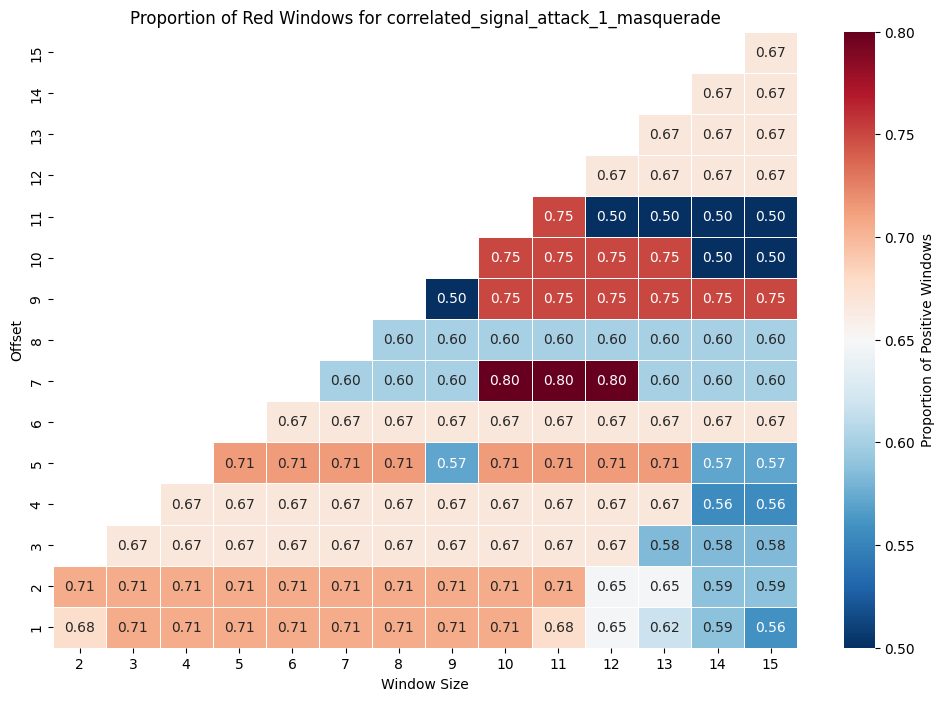

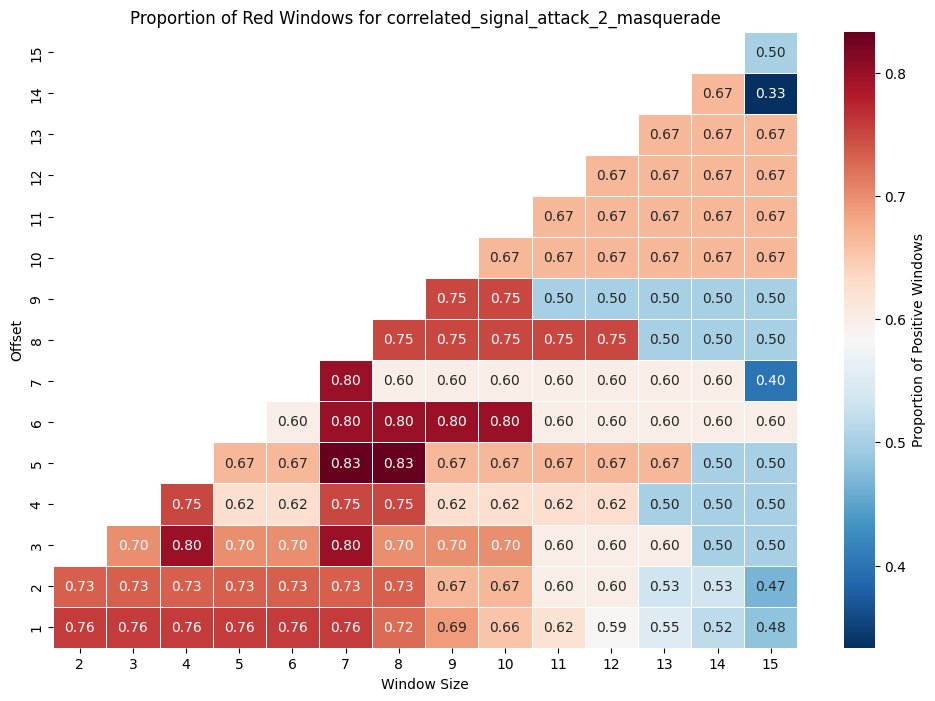

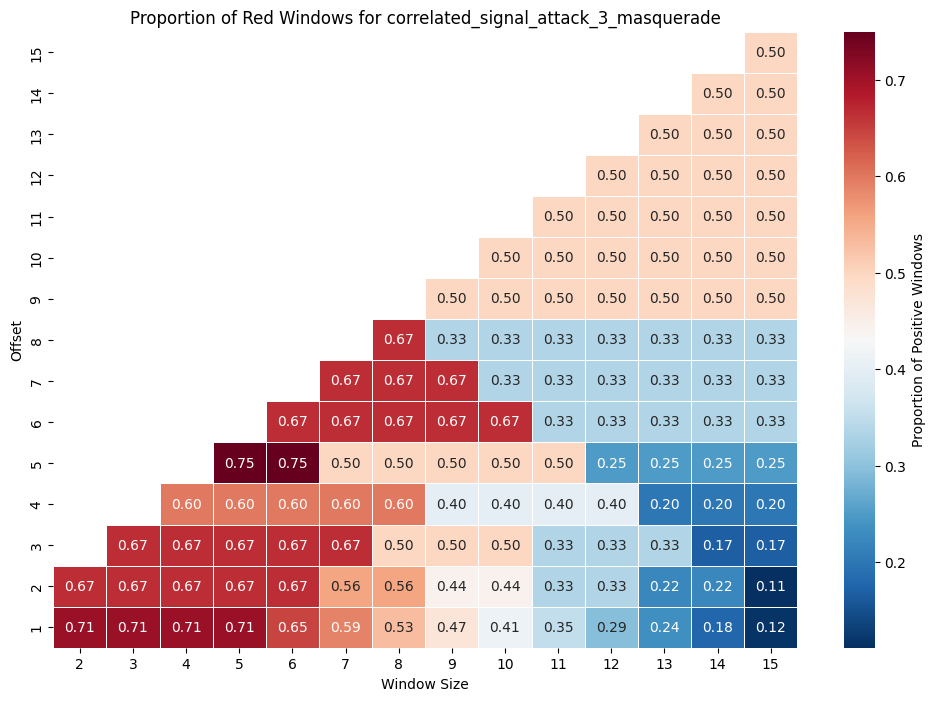

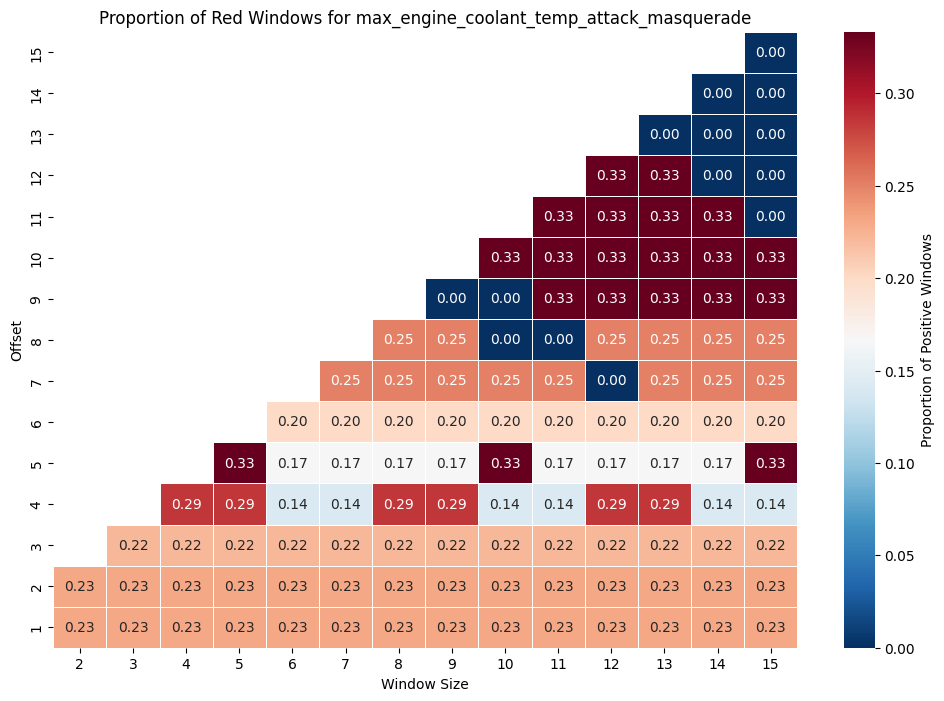

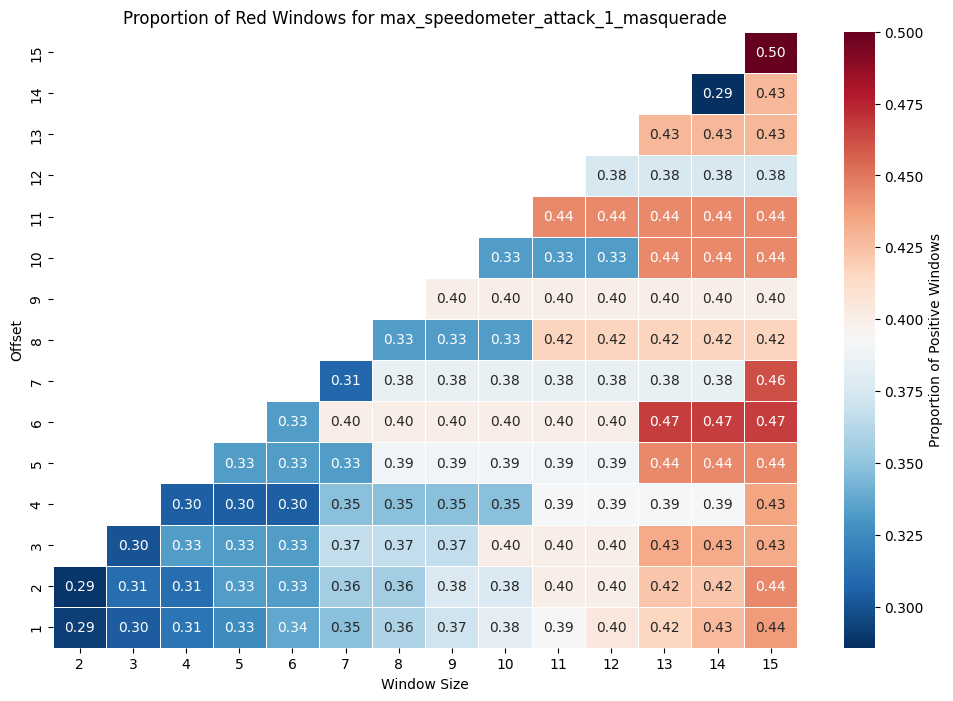

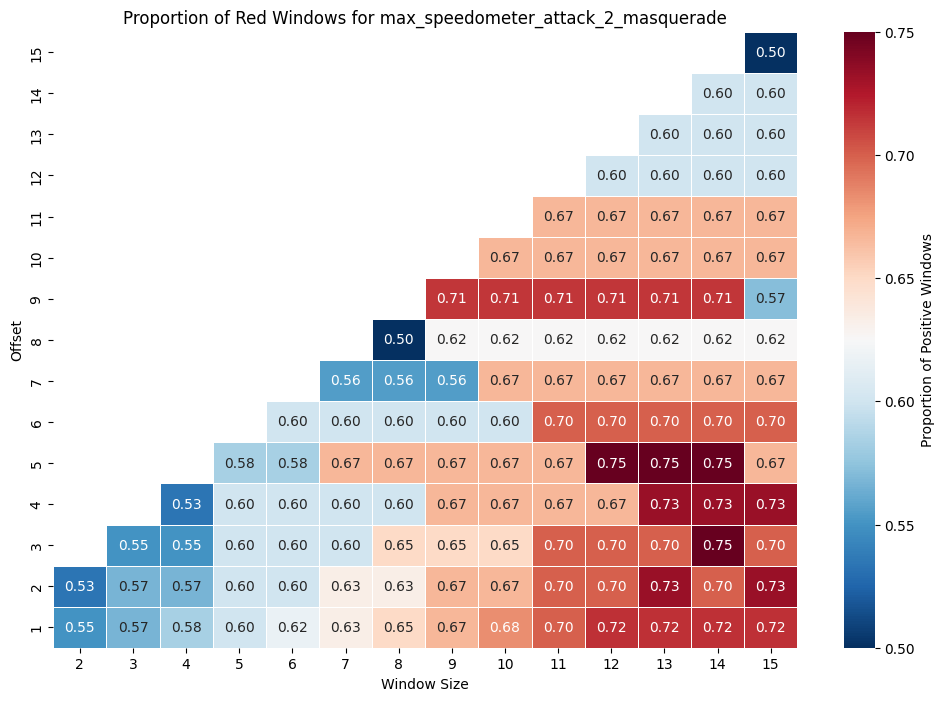

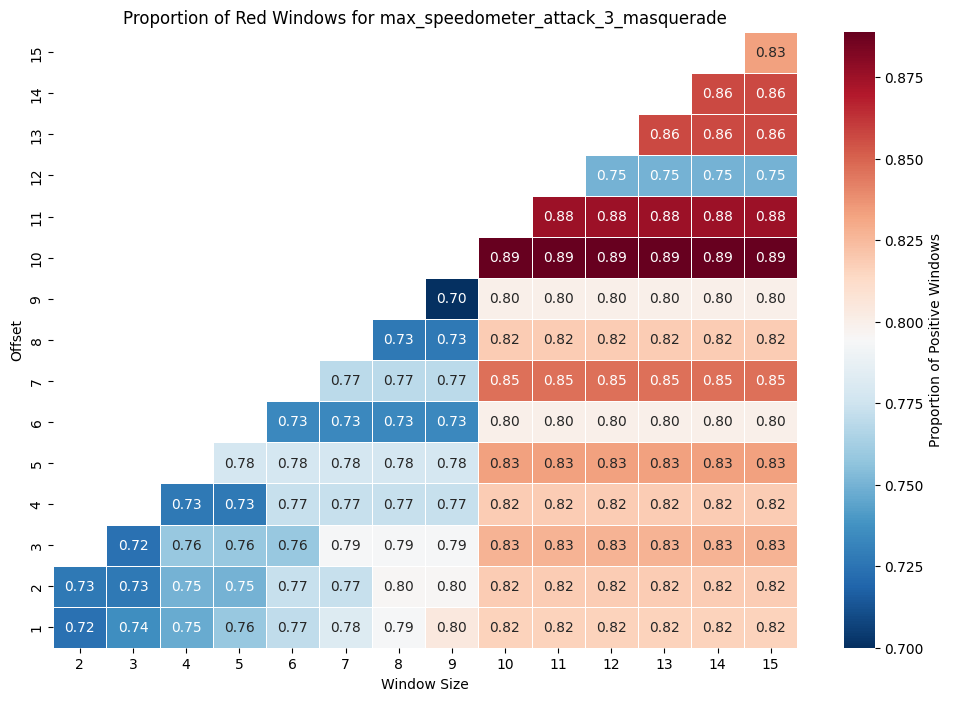

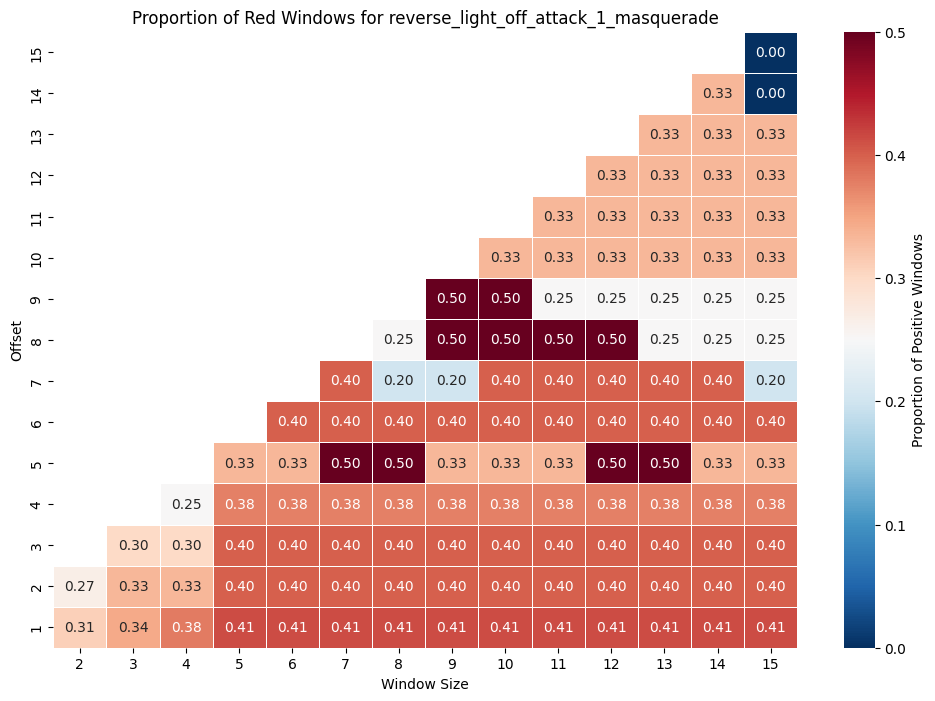

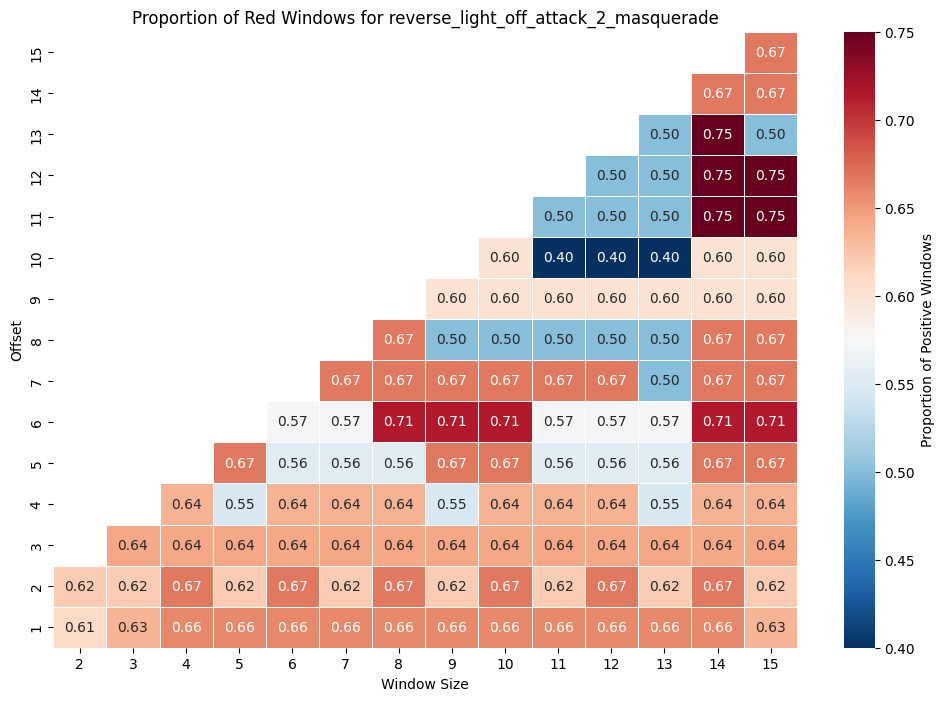

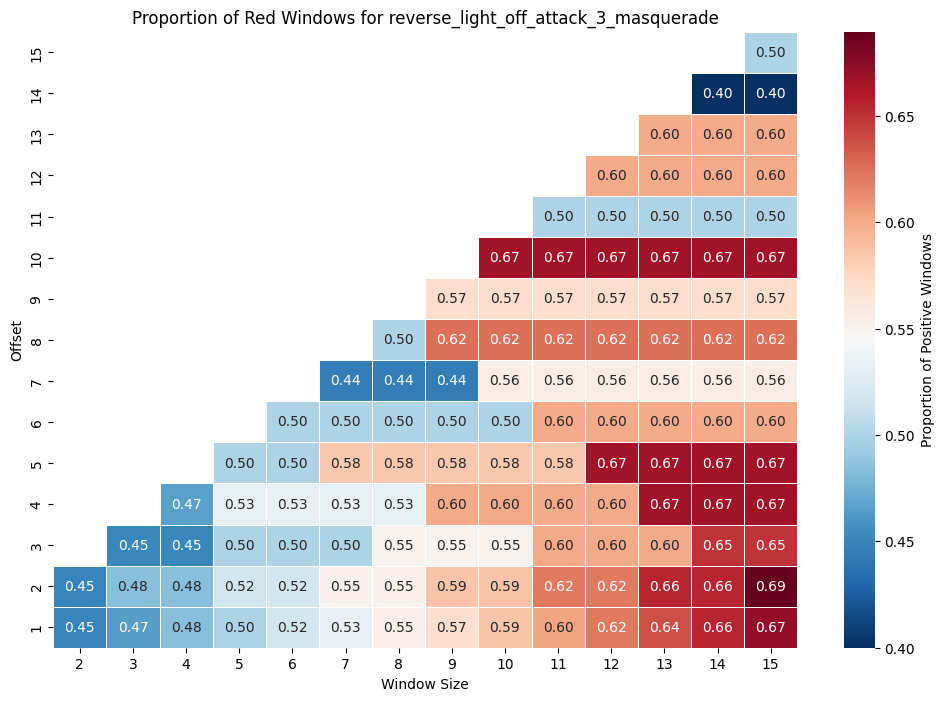

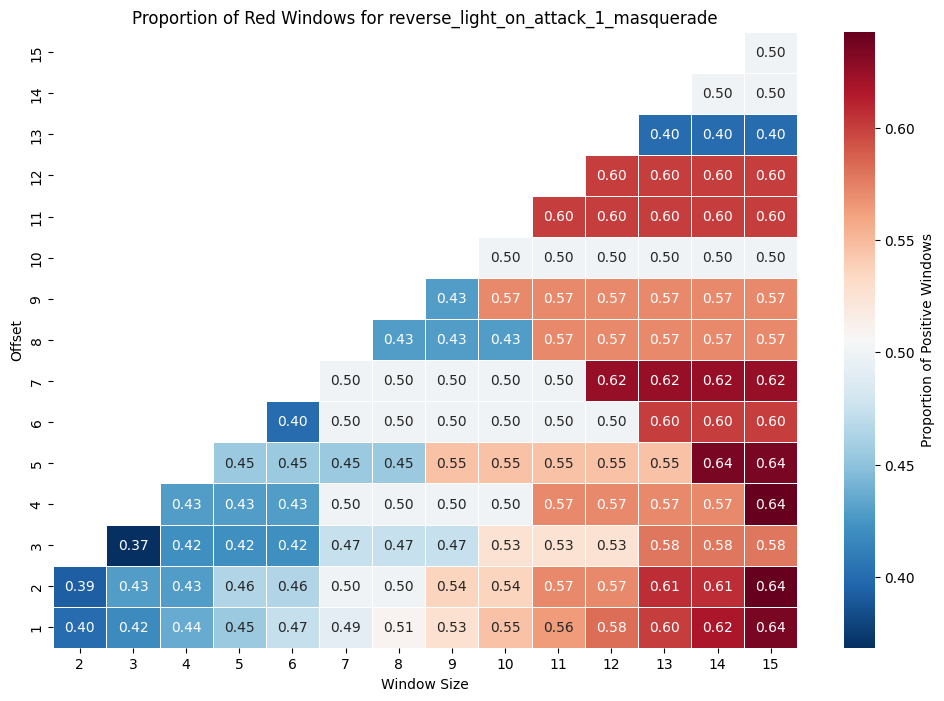

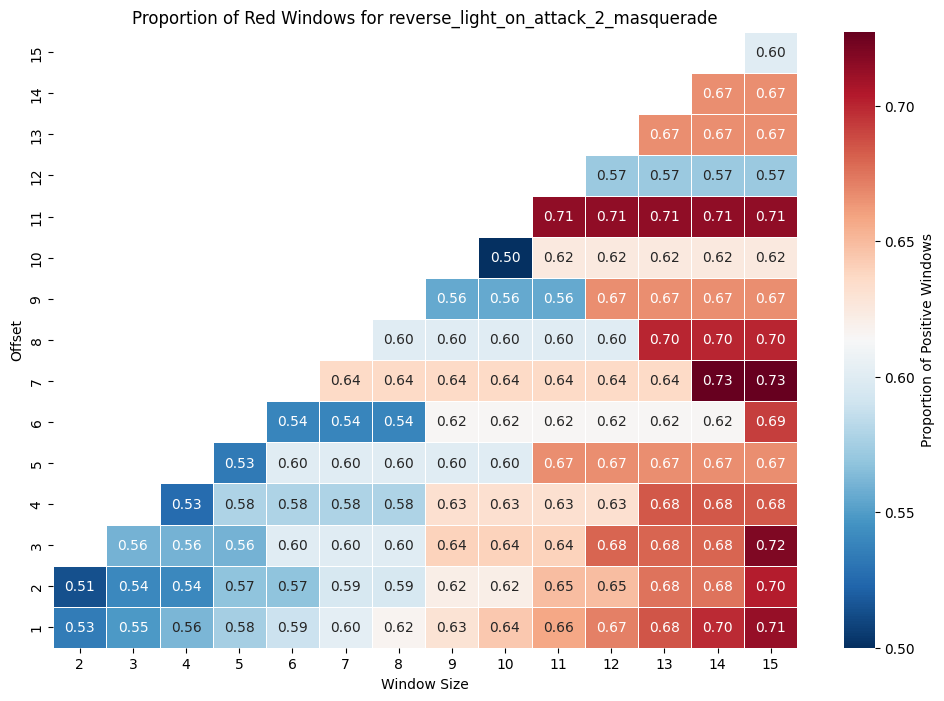

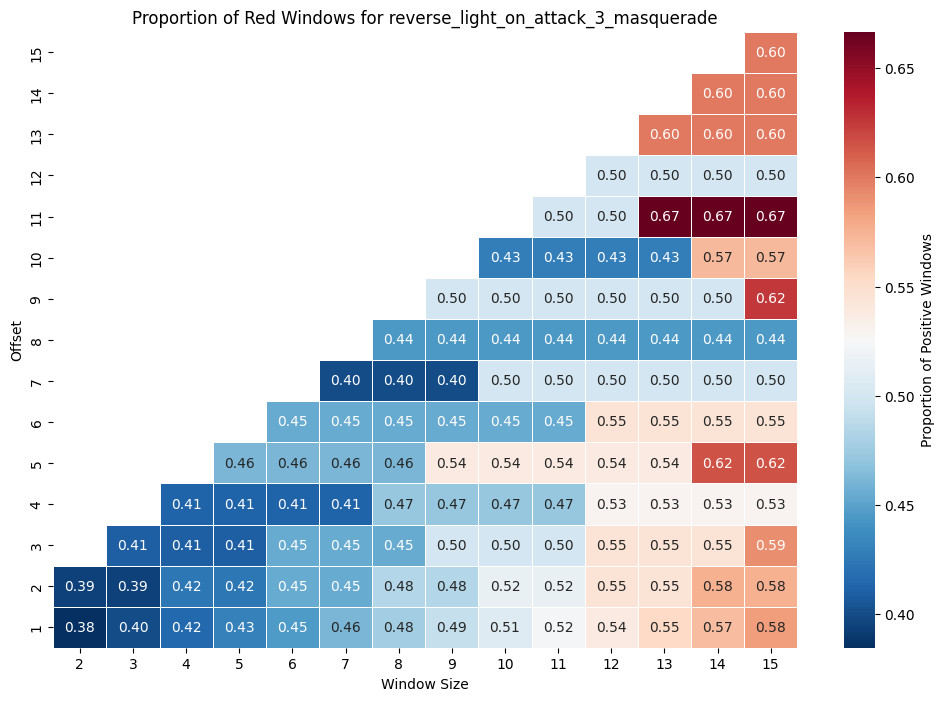

In [5]:
create_heatmap_for_attack('correlated_signal_attack_1_masquerade', all_results)
create_heatmap_for_attack('correlated_signal_attack_2_masquerade', all_results)
create_heatmap_for_attack('correlated_signal_attack_3_masquerade', all_results)

create_heatmap_for_attack('max_engine_coolant_temp_attack_masquerade', all_results)
create_heatmap_for_attack('max_speedometer_attack_1_masquerade', all_results)
create_heatmap_for_attack('max_speedometer_attack_2_masquerade', all_results)
create_heatmap_for_attack('max_speedometer_attack_3_masquerade', all_results)

create_heatmap_for_attack('reverse_light_off_attack_1_masquerade', all_results)
create_heatmap_for_attack('reverse_light_off_attack_2_masquerade', all_results)
create_heatmap_for_attack('reverse_light_off_attack_3_masquerade', all_results)

create_heatmap_for_attack('reverse_light_on_attack_1_masquerade', all_results)
create_heatmap_for_attack('reverse_light_on_attack_2_masquerade', all_results)
create_heatmap_for_attack('reverse_light_on_attack_3_masquerade', all_results)


In [6]:
1


1

In [7]:
# Define the names of attacks for each class
attack_classes = {
    "Correlated Signal Attacks": [
        'correlated_signal_attack_1_masquerade', 
        'correlated_signal_attack_2_masquerade', 
        'correlated_signal_attack_3_masquerade'
    ],
    "Max Engine Coolant Temperature Attacks": [
        'max_engine_coolant_temp_attack_masquerade'
    ],
    "Max Speedometer Attacks": [
        'max_speedometer_attack_1_masquerade',
        'max_speedometer_attack_2_masquerade',
        'max_speedometer_attack_3_masquerade'
    ],
    "Reverse Light Off Attacks": [
        'reverse_light_off_attack_1_masquerade',
        'reverse_light_off_attack_2_masquerade',
        'reverse_light_off_attack_3_masquerade'
    ],
    "Reverse Light On Attacks": [
        'reverse_light_on_attack_1_masquerade',
        'reverse_light_on_attack_2_masquerade',
        'reverse_light_on_attack_3_masquerade'
    ]
}

# Define the aggregate_proportions function if not already defined
def aggregate_proportions(all_results, attack_class_names):
    aggregate_data = {}
    
    for window_size, offset in combinations:
        aggregate_data[(window_size, offset)] = []

    for attack_name in attack_class_names:
        if attack_name in all_results:
            for result in all_results[attack_name]:
                key = (result['Window Size'], result['Offset'])
                aggregate_data[key].append(result['Proportion of Red Windows'])

    average_data = {}
    for key, values in aggregate_data.items():
        if values:
            average_data[key] = sum(values) / len(values)
    
    return average_data

def create_heatmap_for_class(average_data, class_name):
    df = pd.DataFrame([
        {"Window Size": ws, "Offset": offset, "Average Proportion": avg_prop}
        for (ws, offset), avg_prop in average_data.items()
    ])
    pivot_table = df.pivot_table(index="Offset", columns="Window Size", values="Average Proportion")

    plt.figure(figsize=(12, 8))
    ax = sns.heatmap(pivot_table, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5)
    plt.title(f'Average Proportion of Red Windows for {class_name}')
    plt.xlabel('Window Size')
    plt.ylabel('Offset')
    ax.invert_yaxis()

    # our save_path
    save_path = f"C:\\Users\\willi\\CAN_experiments\\ground_truth_heatmaps\\{class_name.replace(' ', '_').replace('/', '_')}_average.png"
    plt.savefig(save_path)
    plt.clf()


# Iterate over each class of attacks, calculate the average, and generate heatmaps
for class_name, attack_names in attack_classes.items():
    average_data_class = aggregate_proportions(all_results, attack_names)
    create_heatmap_for_class(average_data_class, class_name)


<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

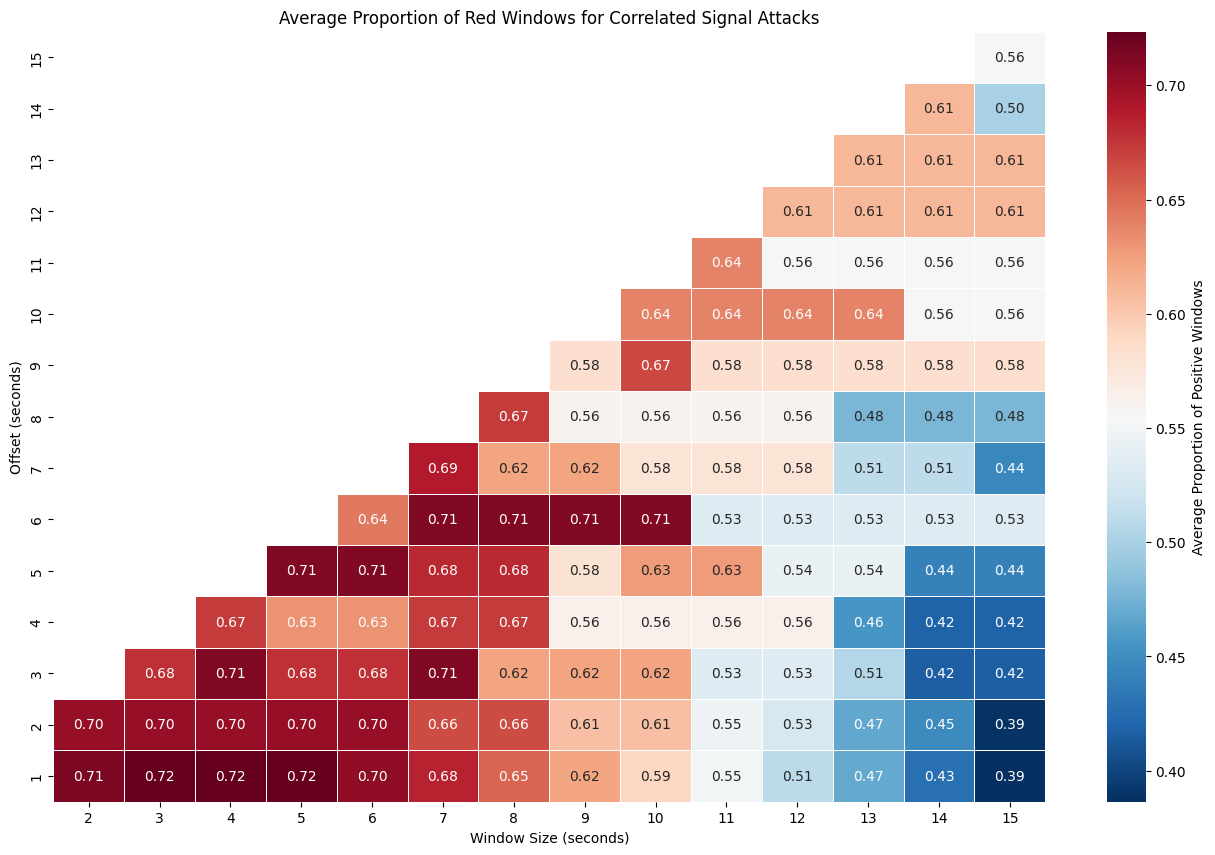

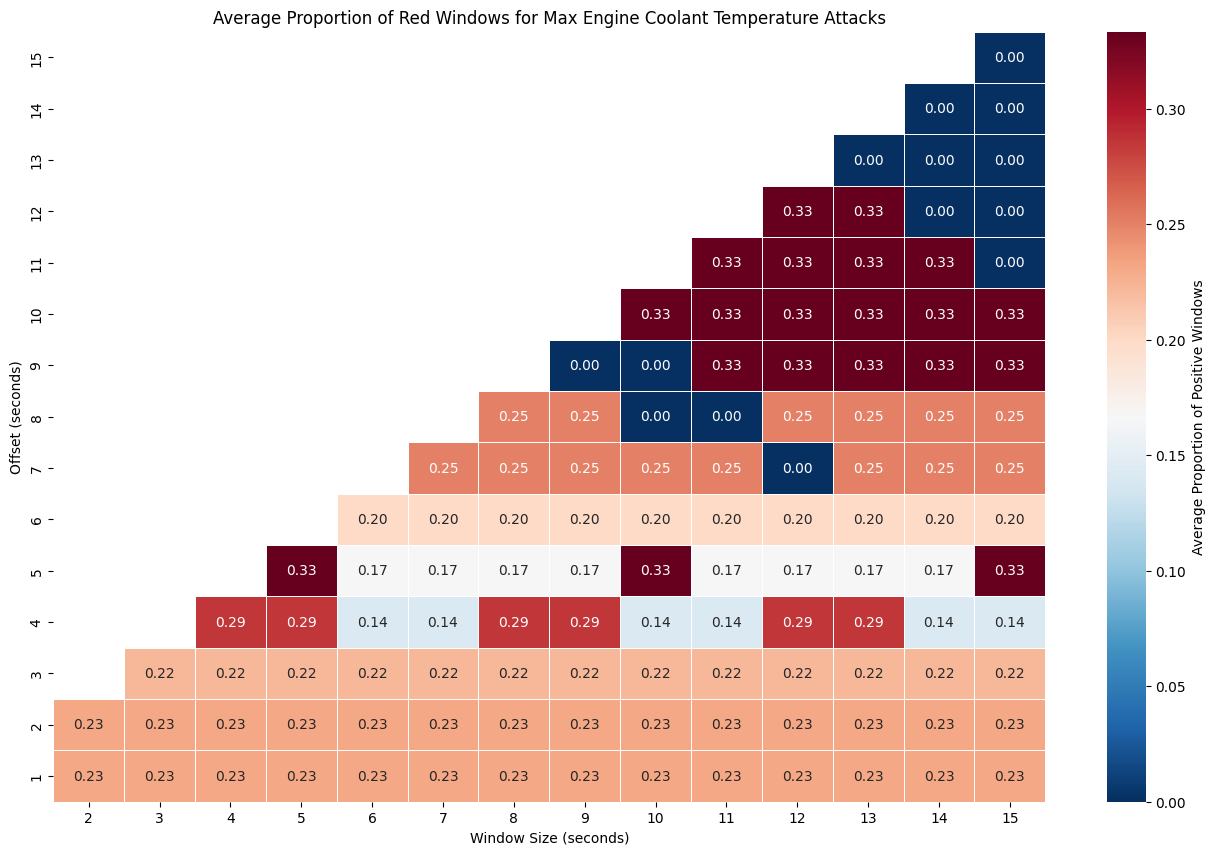

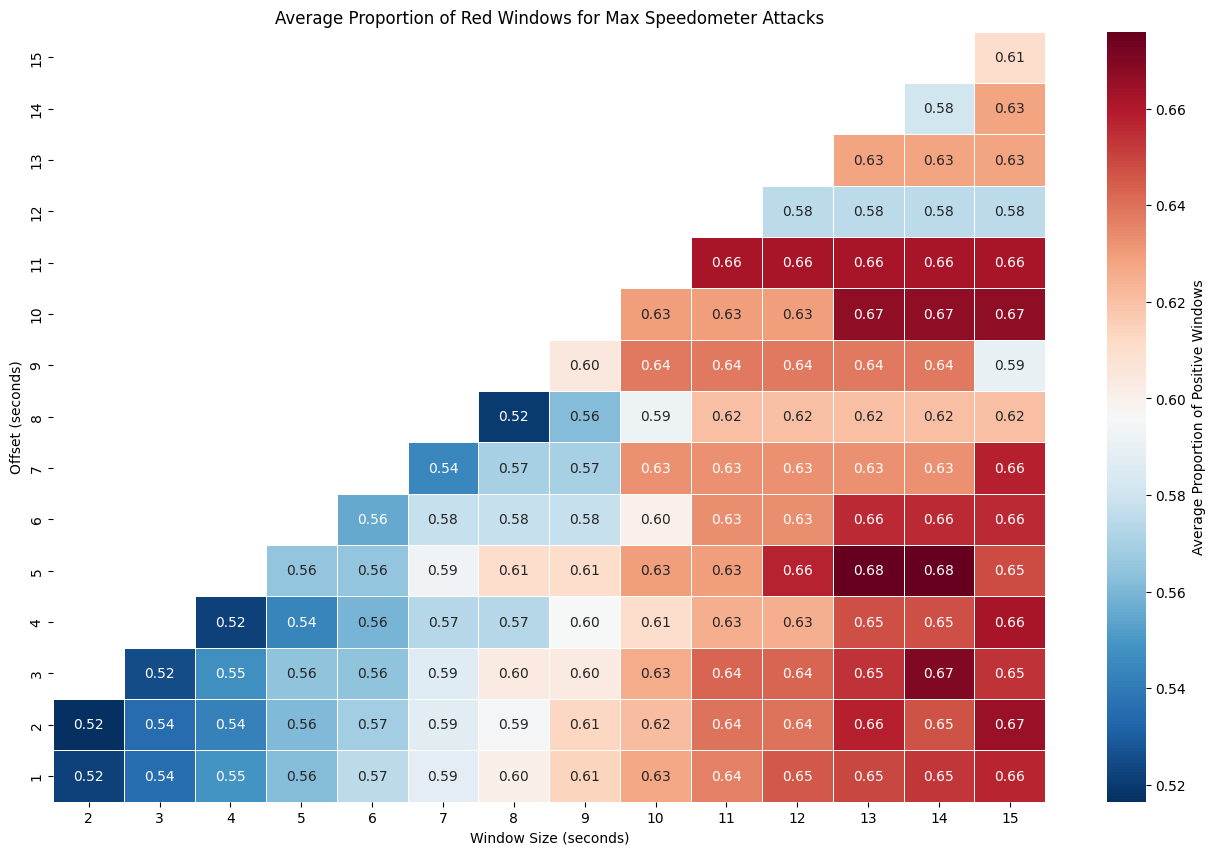

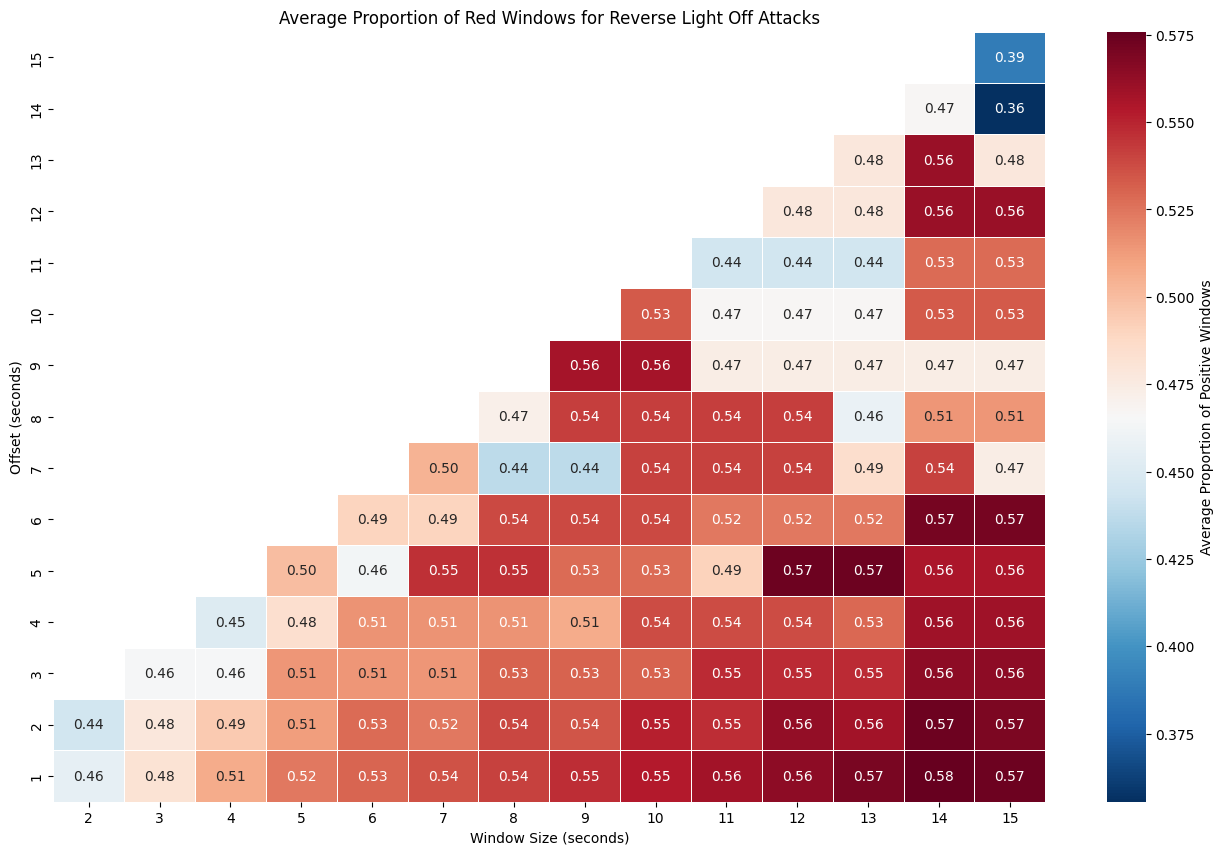

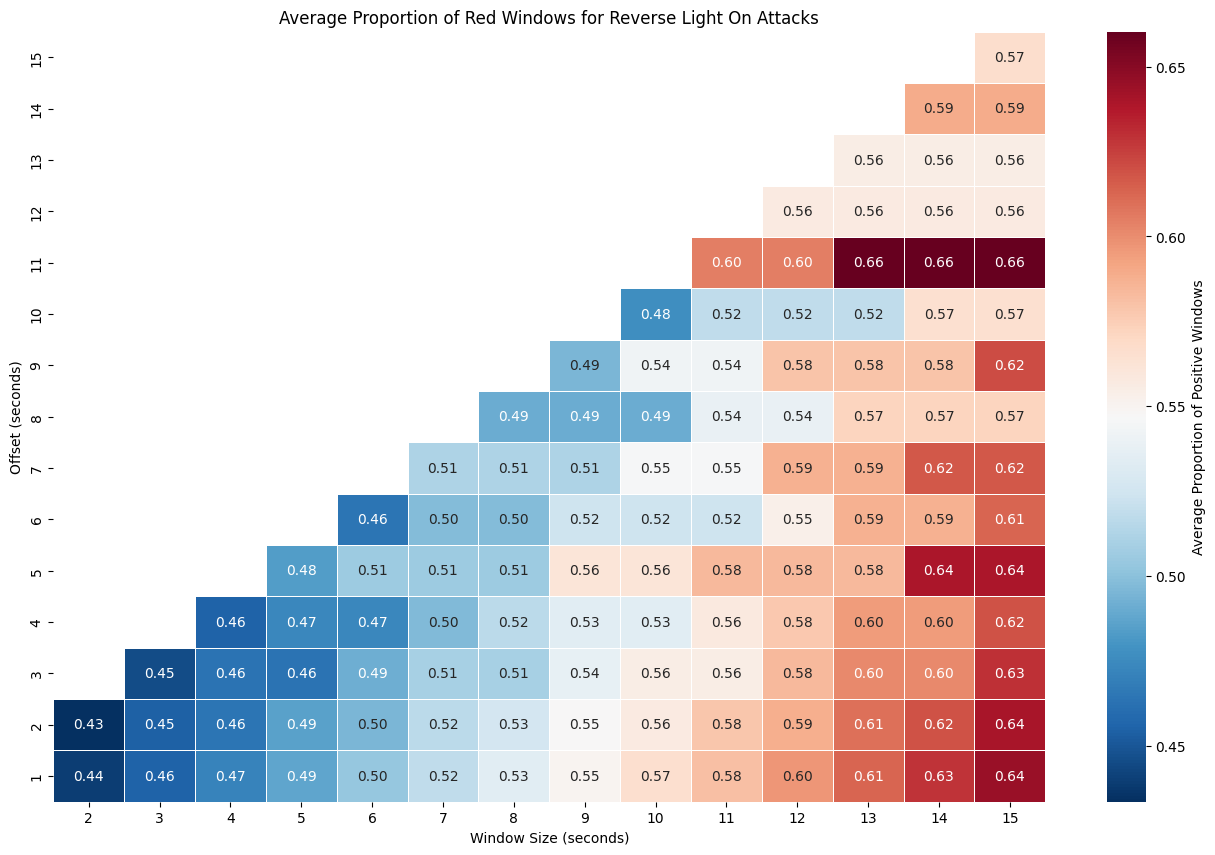

In [8]:
def create_heatmap_for_class(average_data, class_name, save_path="C:\\Users\\willi\\CAN_experiments\\ground_truth_heatmaps\\"):
    os.makedirs(save_path, exist_ok=True)  # Ensure the save directory exists
    
    df = pd.DataFrame([
        {"Window Size": ws, "Offset": offset, "Average Proportion": avg_prop}
        for (ws, offset), avg_prop in average_data.items()
    ])
    pivot_table = df.pivot_table(index="Offset", columns="Window Size", values="Average Proportion")
    
    # we cn adjust the figure size here, for example, (16, 10) for a larger plot
    plt.figure(figsize=(16, 10))
    ax = sns.heatmap(pivot_table, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Average Proportion of Positive Windows'})
    plt.title(f'Average Proportion of Red Windows for {class_name}')
    plt.xlabel('Window Size (seconds)')
    plt.ylabel('Offset (seconds)')
    ax.invert_yaxis()
    
    file_name = f"{class_name.replace(' ', '_').replace('/', '_')}_average.png"
    plt.savefig(os.path.join(save_path, file_name), dpi=300, bbox_inches='tight')
    #plt.clf()  # Clear the plot to free up memory

# Iterate over each class of attacks, calculate the average, and generate heatmaps
for class_name, attack_names in attack_classes.items():
    average_data_class = aggregate_proportions(all_results, attack_names)
    create_heatmap_for_class(average_data_class, class_name)


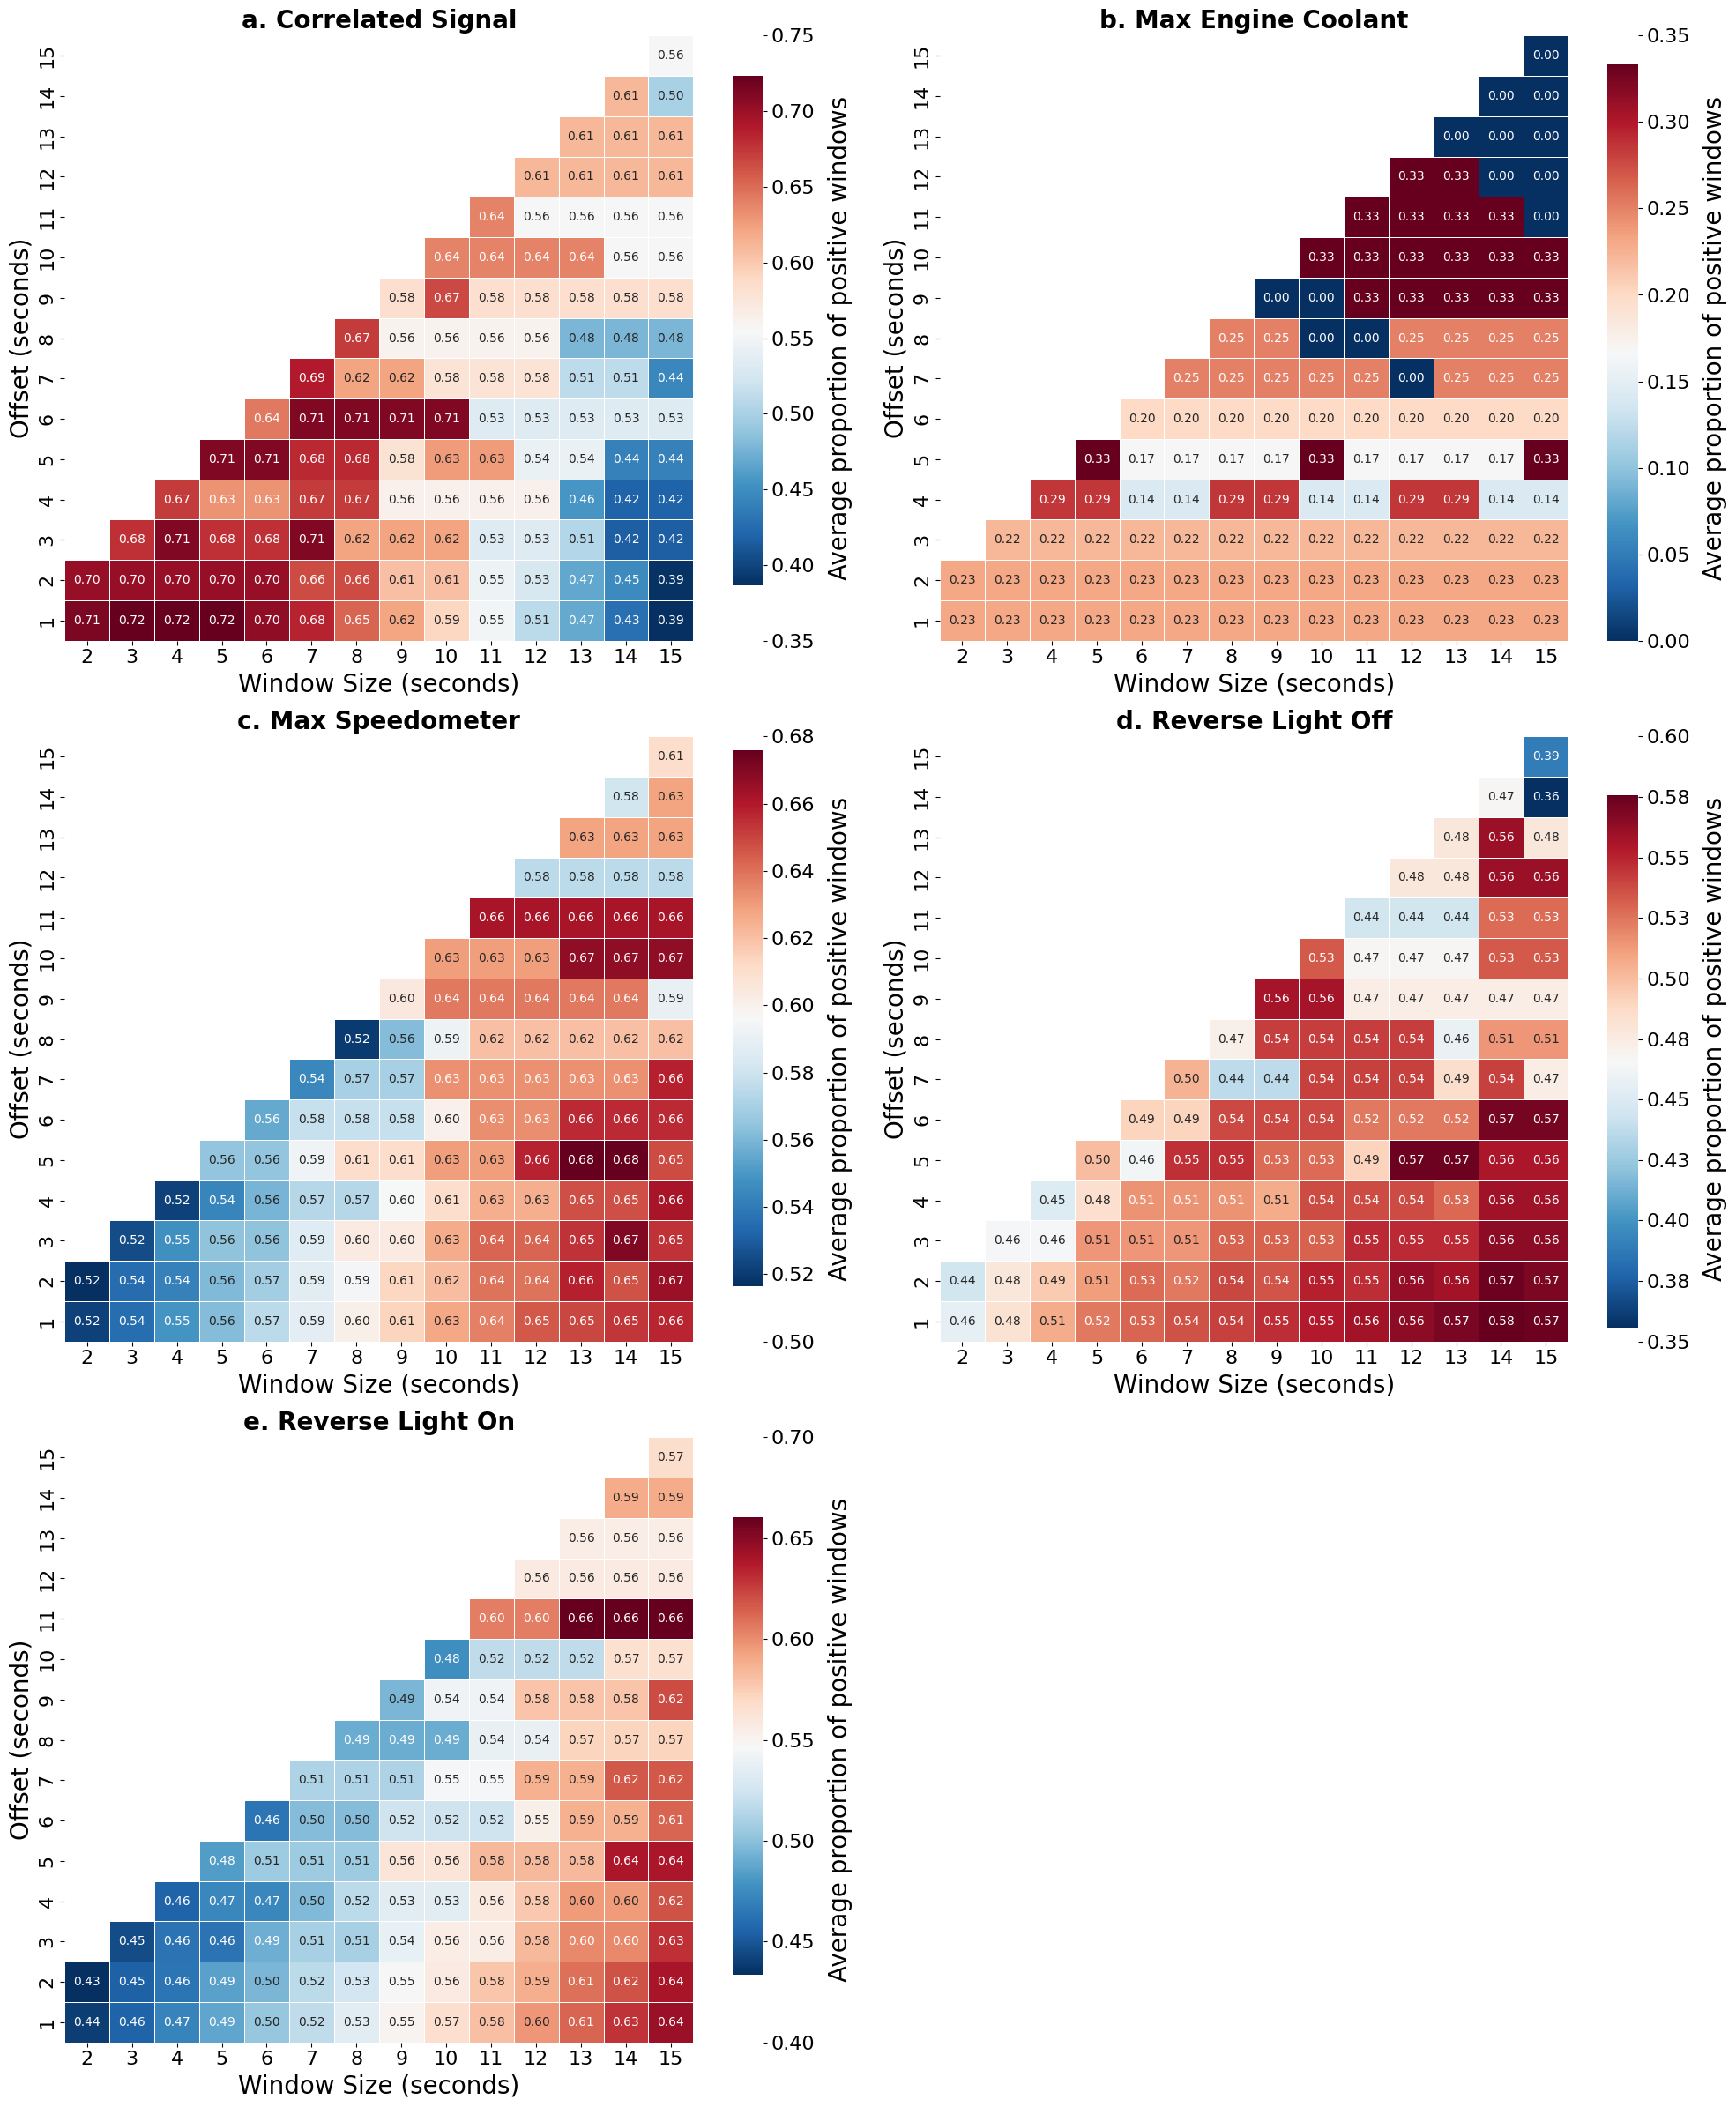

In [9]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the save path
save_path = "C:/Users/willi/CAN_experiments/ground_truth_heatmaps/"
os.makedirs(save_path, exist_ok=True)

def create_combined_heatmap(attack_classes, all_results):
    num_attacks = len(attack_classes)
    titles = ["a. Correlated Signal", "b. Max Engine Coolant", "c. Max Speedometer", "d. Reverse Light Off", "e. Reverse Light On"]
    num_rows = (num_attacks + 1) // 2 if num_attacks % 2 else num_attacks // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, num_rows * 8))  # Adjust for appropriate size
    axes = axes.flatten()

    for idx, (class_name, attack_names) in enumerate(attack_classes.items()):
        # Placeholder for aggregate_proportions function - replace with actual data processing
        average_data_class = aggregate_proportions(all_results, attack_names)
        df = pd.DataFrame([
            {"Window Size": ws, "Offset": offset, "Average Proportion": avg_prop}
            for (ws, offset), avg_prop in average_data_class.items()
        ])
        pivot_table = df.pivot(index="Offset", columns="Window Size", values="Average Proportion")
        
        ax = sns.heatmap(pivot_table, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5, 
                         cbar_kws={'label': 'Average proportion of positive windows'}, ax=axes[idx])
        ax.set_title(titles[idx], fontsize=20, weight='bold')  # Use the titles from the provided list
        ax.set_xlabel('Window Size (seconds)', fontsize=20)
        ax.set_ylabel('Offset (seconds)', fontsize=20)
        ax.invert_yaxis()

        # Set the tick labels font size for both x and y axes
        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)

        # Adjust the font size of the colorbar's label
        cbar = ax.collections[0].colorbar
        cbar.set_label('Average proportion of positive windows', fontsize=20, labelpad=10)
        cbar.ax.tick_params(labelsize=16)  # Adjust the font size as needed for the colorbar ticks
        
        # Enforce two decimal places for the colorbar tick labels
        cbar.set_ticks([tick for tick in cbar.get_ticks()])  # Set custom ticks if needed
        cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])  # Format to two decimal places


    # If the number of attack classes is odd, remove the last (unused) subplot
    if num_attacks % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    
    # Save the figure BEFORE showing it
    combined_filename = os.path.join(save_path, "combined_heatmaps.png")
    plt.savefig(combined_filename, dpi=300, bbox_inches='tight')
    
    # Then display the figure
    plt.show()  
    plt.close(fig)  # Close the figure to free up memory

# Call the function to generate the heatmaps
# Make sure to define or import 'attack_classes' and 'all_results' before calling the function
create_combined_heatmap(attack_classes, all_results)


C:\Users\willi\AppData\Local\Temp\ipykernel_32044\899708038.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])
C:\Users\willi\AppData\Local\Temp\ipykernel_32044\899708038.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


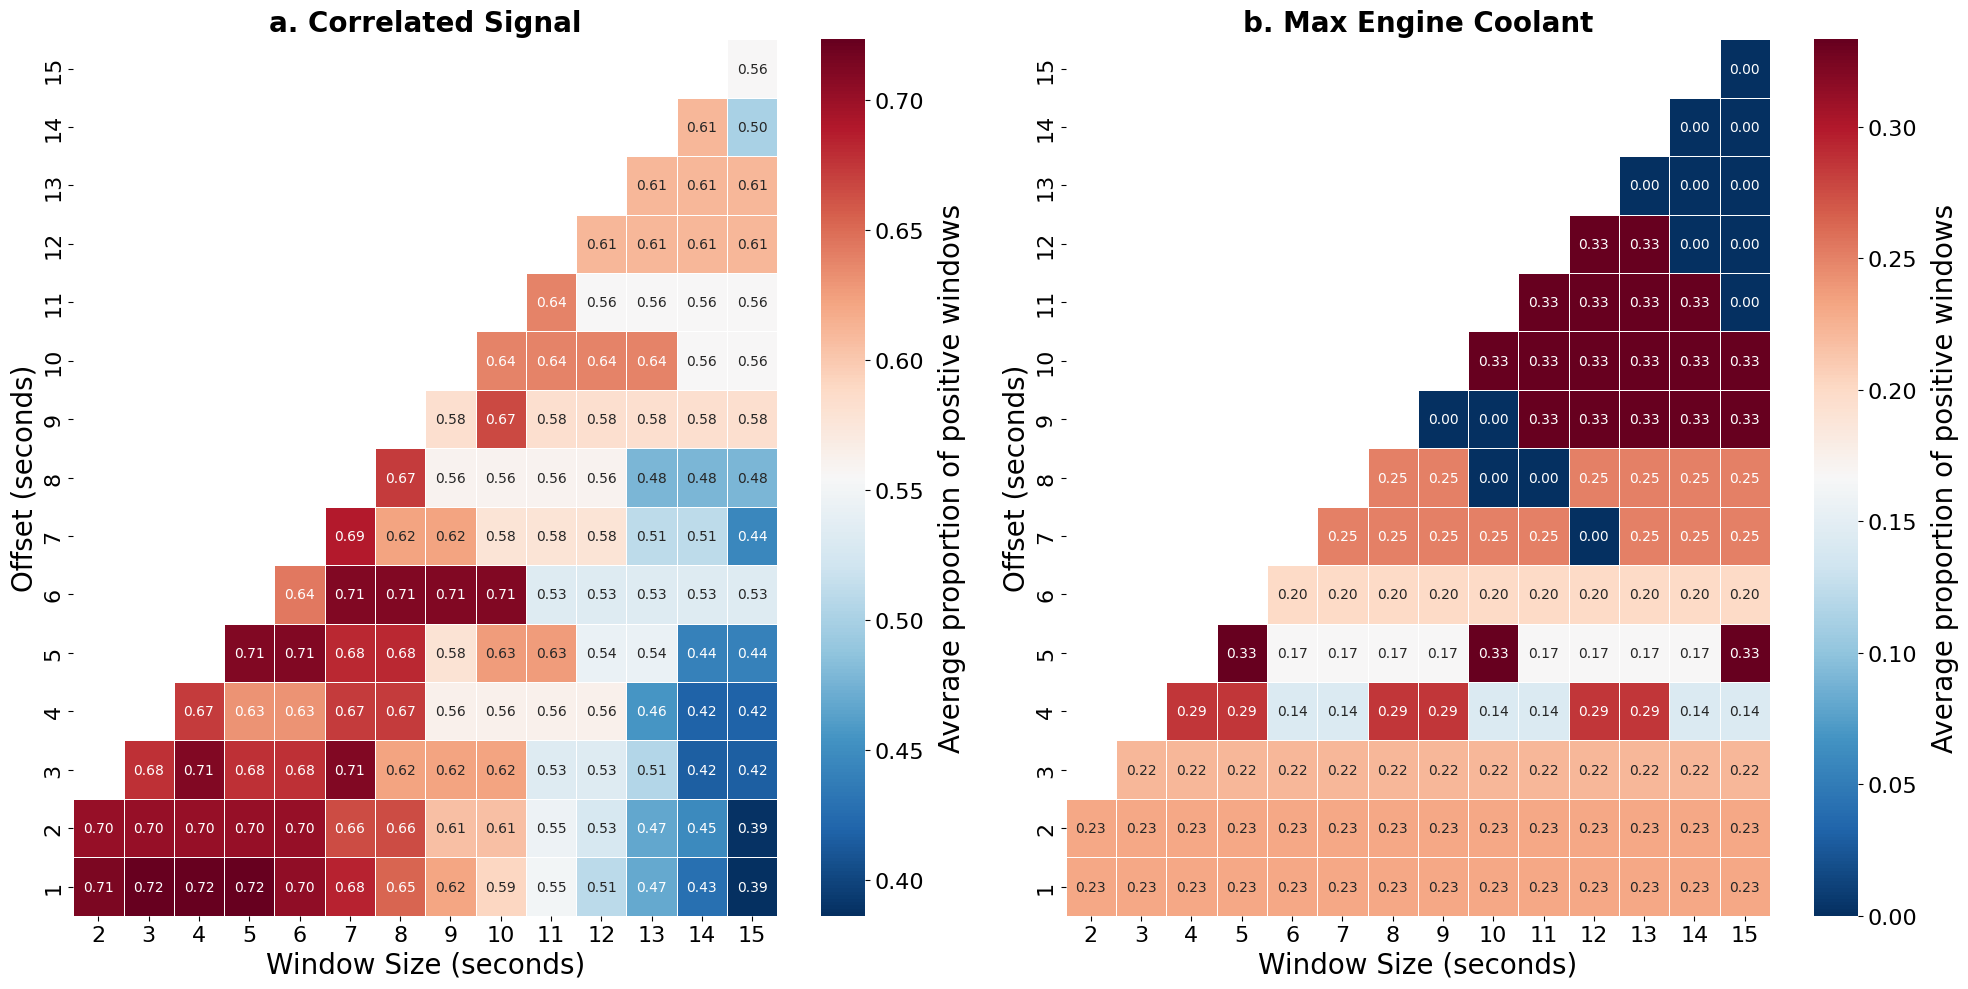

In [10]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the save path
save_path = "C:/Users/willi/CAN_experiments/ground_truth_heatmaps/"
os.makedirs(save_path, exist_ok=True)

def create_combined_heatmap(attack_classes, all_results):
    titles = ["a. Correlated Signal", "b. Max Engine Coolant"]  # Example titles, adjust based on actual data
    num_rows = 1  # Only one row
    num_columns = 2  # Two columns to fit two heatmaps
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 10))  # Adjust size as needed
    axes = axes.flatten()  # Flatten in case of single row to simplify indexing

    idx = 0
    for class_name, attack_names in attack_classes.items():
        if idx >= num_columns:  # Break the loop if more than two classes have been plotted
            break
        average_data_class = aggregate_proportions(all_results, attack_names)
        df = pd.DataFrame([
            {"Window Size": ws, "Offset": offset, "Average Proportion": avg_prop}
            for (ws, offset), avg_prop in average_data_class.items()
        ])
        pivot_table = df.pivot(index="Offset", columns="Window Size", values="Average Proportion")

        ax = sns.heatmap(pivot_table, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5,
                         cbar_kws={'label': 'Average proportion of positive windows'}, ax=axes[idx])
        ax.set_title(titles[idx], fontsize=20, weight='bold')
        ax.set_xlabel('Window Size (seconds)', fontsize=20)
        ax.set_ylabel('Offset (seconds)', fontsize=20)
        ax.invert_yaxis()

        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)

        cbar = ax.collections[0].colorbar
        cbar.set_label('Average proportion of positive windows', fontsize=20, labelpad=10)
        cbar.ax.tick_params(labelsize=16)
        cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])

        idx += 1  # Increment index to plot on the next axis

    if idx < num_columns:
        for j in range(idx, num_columns):
            fig.delaxes(axes[j])  # Remove any unused axes if fewer plots than slots

    plt.tight_layout()
    combined_filename = os.path.join(save_path, "combined_heatmaps.png")
    plt.savefig(combined_filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Ensure 'attack_classes' and 'all_results' are defined and populated with data before this call
if 'attack_classes' in globals() and 'all_results' in globals():
    create_combined_heatmap(attack_classes, all_results)
else:
    print("Required data is not available.")

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\582293518.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])
C:\Users\willi\AppData\Local\Temp\ipykernel_32044\582293518.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


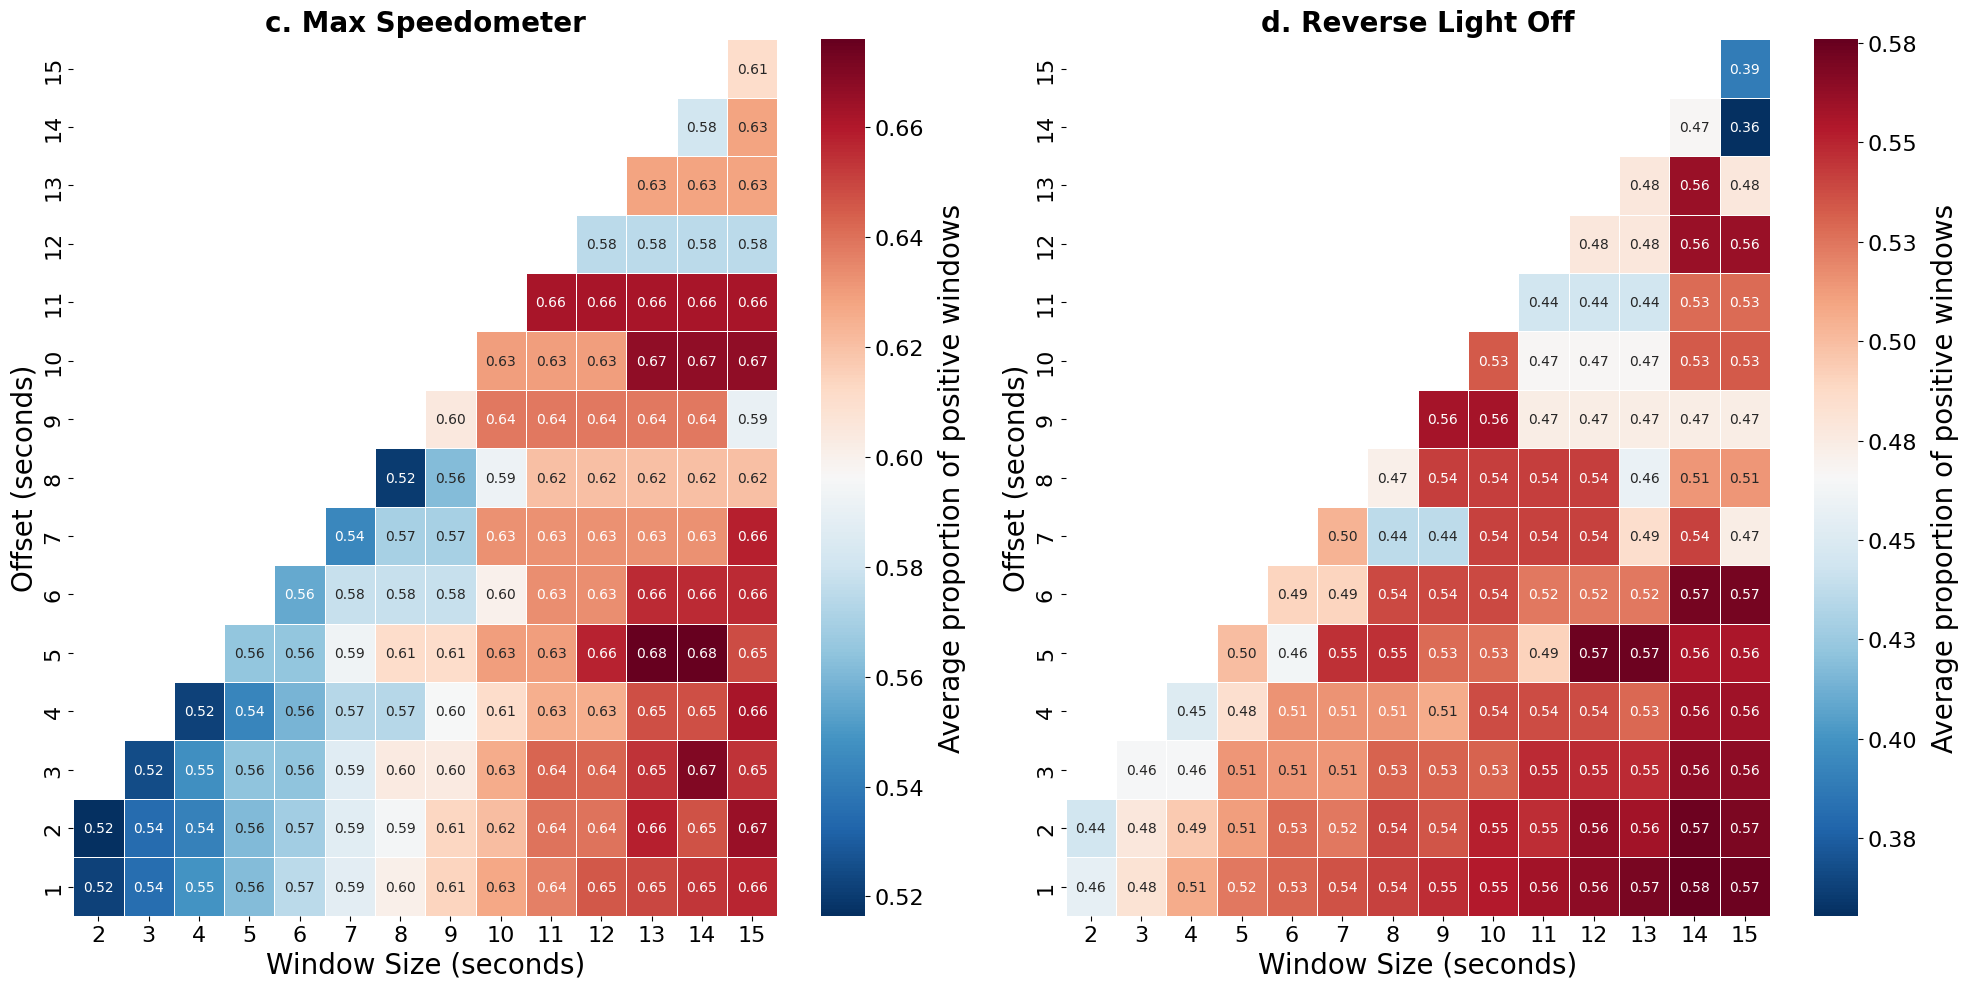

In [11]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the save path
save_path = "C:/Users/willi/CAN_experiments/ground_truth_heatmaps/"
os.makedirs(save_path, exist_ok=True)

def create_combined_heatmap(attack_classes, all_results, start_index=2):
    # Adjust the titles list to the appropriate titles based on the actual order and content
    # Titles should be adjusted to reflect the data sets you are plotting in this second row
    titles = ["c. Max Speedometer", "d. Reverse Light Off"]  # Example titles for 3rd and 4th sets
    num_rows = 1  # Only one row
    num_columns = 2  # Two columns to fit two heatmaps
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 10))  # Adjust size as needed
    axes = axes.flatten()  # Flatten in case of single row to simplify indexing

    idx = 0
    for i, (class_name, attack_names) in enumerate(attack_classes.items()):
        if i >= start_index + num_columns:  # Skip past the elements for this row
            break
        if i >= start_index:  # Start plotting from the start_index
            average_data_class = aggregate_proportions(all_results, attack_names)
            df = pd.DataFrame([
                {"Window Size": ws, "Offset": offset, "Average Proportion": avg_prop}
                for (ws, offset), avg_prop in average_data_class.items()
            ])
            pivot_table = df.pivot(index="Offset", columns="Window Size", values="Average Proportion")

            ax = sns.heatmap(pivot_table, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5,
                             cbar_kws={'label': 'Average proportion of positive windows'}, ax=axes[idx])
            ax.set_title(titles[idx], fontsize=20, weight='bold')
            ax.set_xlabel('Window Size (seconds)', fontsize=20)
            ax.set_ylabel('Offset (seconds)', fontsize=20)
            ax.invert_yaxis()

            for label in (ax.get_xticklabels() + ax.get_yticklabels()):
                label.set_fontsize(16)

            cbar = ax.collections[0].colorbar
            cbar.set_label('Average proportion of positive windows', fontsize=20, labelpad=10)
            cbar.ax.tick_params(labelsize=16)
            cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])

            idx += 1  # Increment index to plot on the next axis

    if idx < num_columns:
        for j in range(idx, num_columns):
            fig.delaxes(axes[j])  # Remove any unused axes if fewer plots than slots

    plt.tight_layout()
    combined_filename = os.path.join(save_path, "combined_heatmaps_row2.png")  # Save with a different file name
    plt.savefig(combined_filename, dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Ensure 'attack_classes' and 'all_results' are defined and populated with data before this call
if 'attack_classes' in globals() and 'all_results' in globals():
    create_combined_heatmap(attack_classes, all_results)
else:
    print("Required data is not available.")

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\1940295131.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


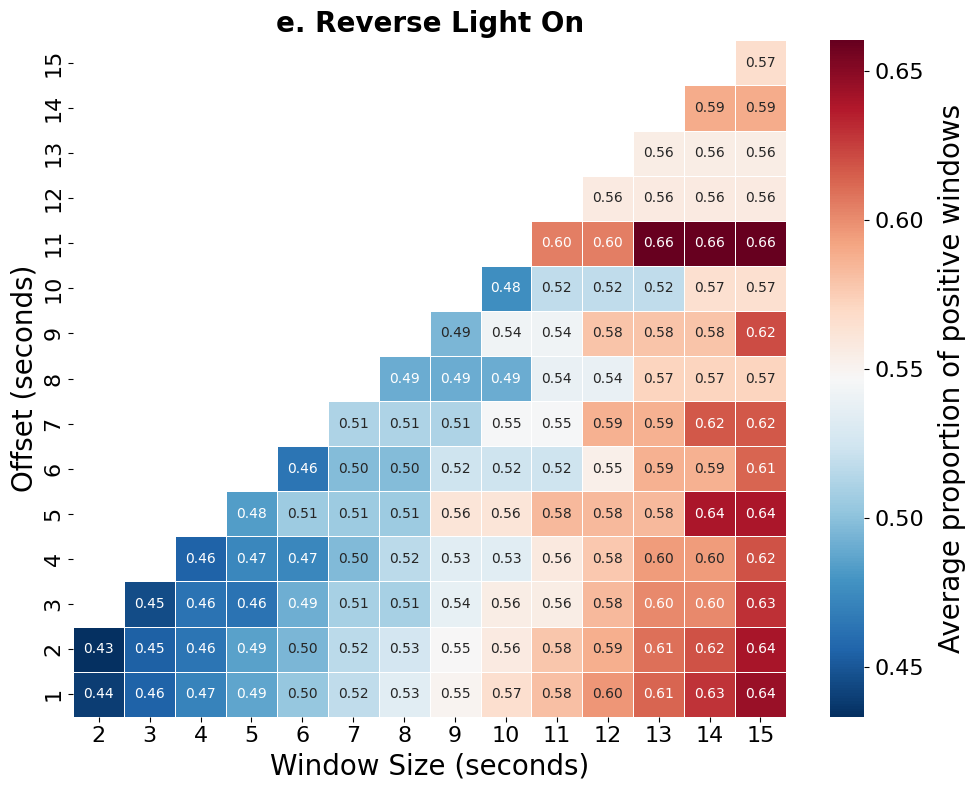

In [12]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the save path
save_path = "C:/Users/willi/CAN_experiments/ground_truth_heatmaps/"
os.makedirs(save_path, exist_ok=True)

def create_last_heatmap(attack_classes, all_results, start_index=4):
    # Titles list adjusted for the last set, change as necessary based on your actual data
    titles = ["e. Reverse Light On"]  # Example title for the last set
    num_rows = 1  # Only one row
    num_columns = 1  # One column for the last heatmap
    fig, ax = plt.subplots(num_rows, num_columns, figsize=(10, 8))  # Adjust size as needed

    for i, (class_name, attack_names) in enumerate(attack_classes.items()):
        if i == start_index:  # Only plot the last set
            average_data_class = aggregate_proportions(all_results, attack_names)
            df = pd.DataFrame([
                {"Window Size": ws, "Offset": offset, "Average Proportion": avg_prop}
                for (ws, offset), avg_prop in average_data_class.items()
            ])
            pivot_table = df.pivot(index="Offset", columns="Window Size", values="Average Proportion")

            sns.heatmap(pivot_table, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5,
                         cbar_kws={'label': 'Average proportion of positive windows'}, ax=ax)
            ax.set_title(titles[0], fontsize=20, weight='bold')
            ax.set_xlabel('Window Size (seconds)', fontsize=20)
            ax.set_ylabel('Offset (seconds)', fontsize=20)
            ax.invert_yaxis()

            for label in (ax.get_xticklabels() + ax.get_yticklabels()):
                label.set_fontsize(16)

            cbar = ax.collections[0].colorbar
            cbar.set_label('Average proportion of positive windows', fontsize=20, labelpad=10)
            cbar.ax.tick_params(labelsize=16)
            cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])

            plt.tight_layout()
            combined_filename = os.path.join(save_path, "combined_heatmaps_last.png")
            plt.savefig(combined_filename, dpi=300, bbox_inches='tight')
            plt.show()
            plt.close(fig)
            break  # Stop after plotting the last one

# Ensure 'attack_classes' and 'all_results' are defined and populated with data before this call
if 'attack_classes' in globals() and 'all_results' in globals():
    create_last_heatmap(attack_classes, all_results)
else:
    print("Required data is not available.")

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\3906454008.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


<Figure size 640x480 with 0 Axes>

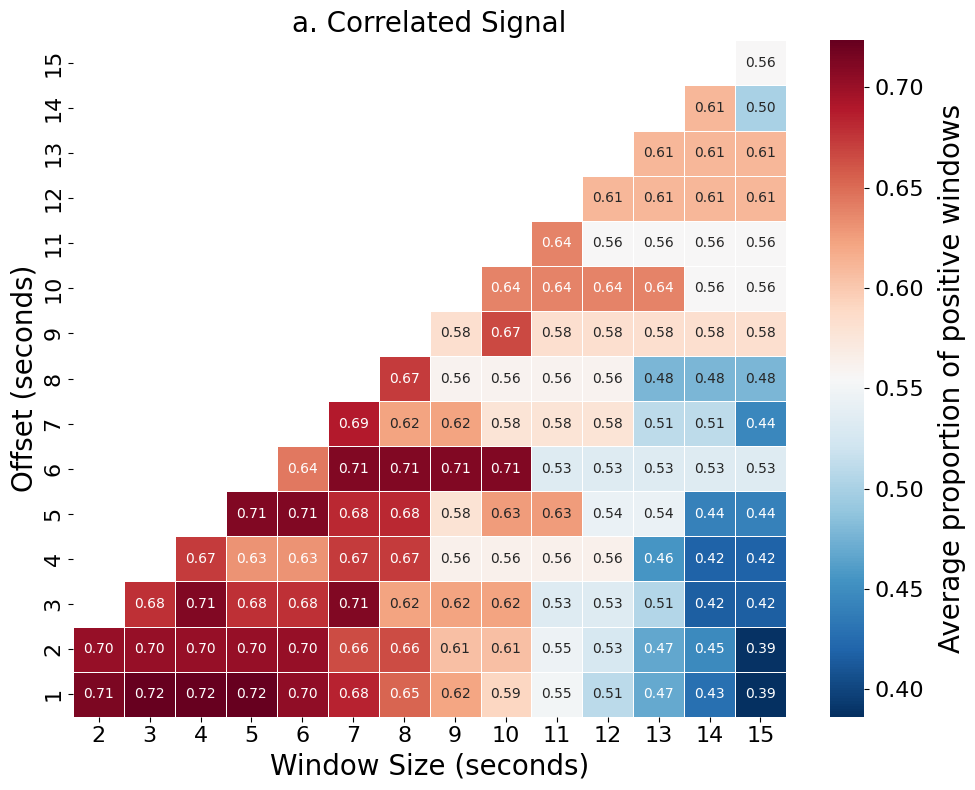

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\3906454008.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


<Figure size 640x480 with 0 Axes>

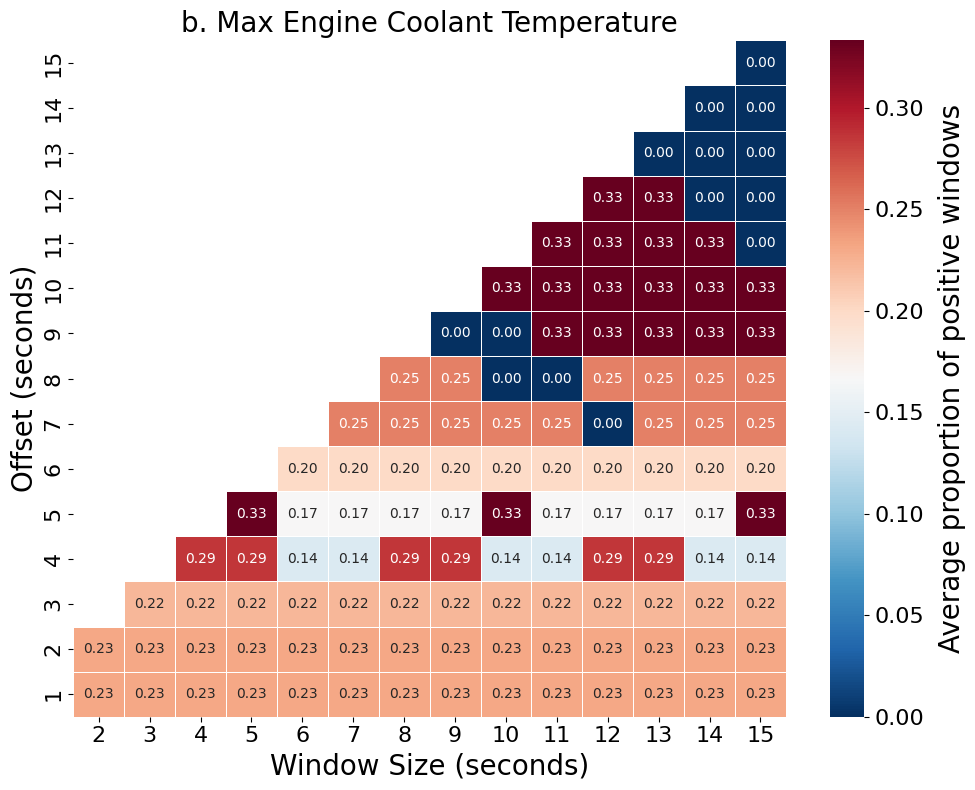

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\3906454008.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


<Figure size 640x480 with 0 Axes>

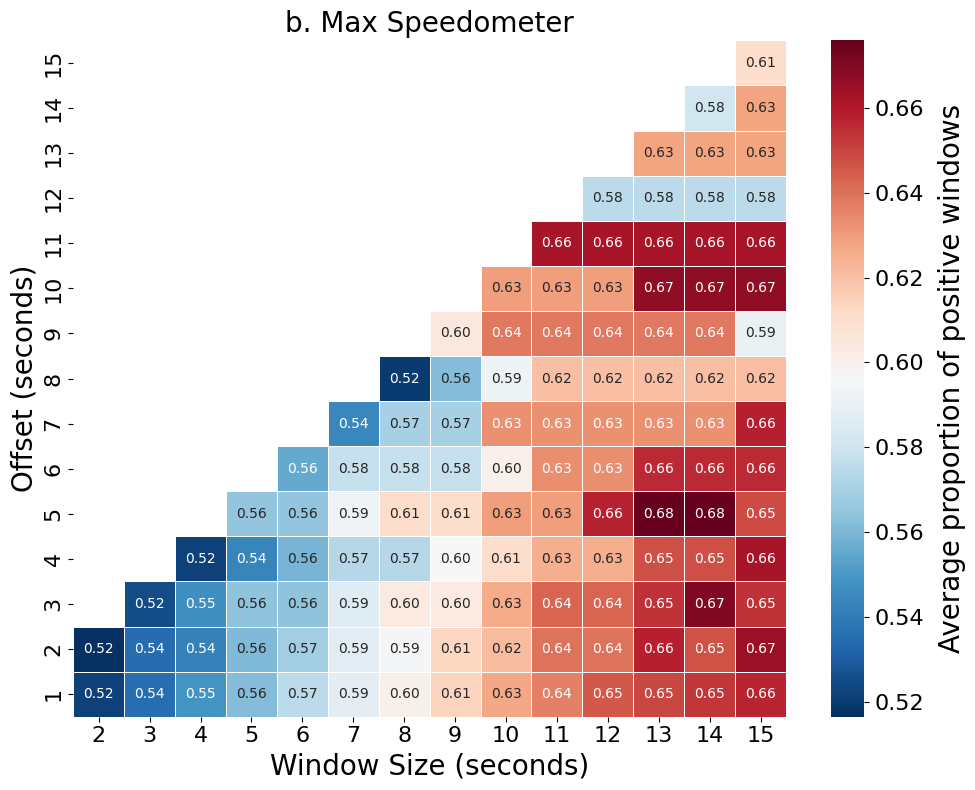

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\3906454008.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


<Figure size 640x480 with 0 Axes>

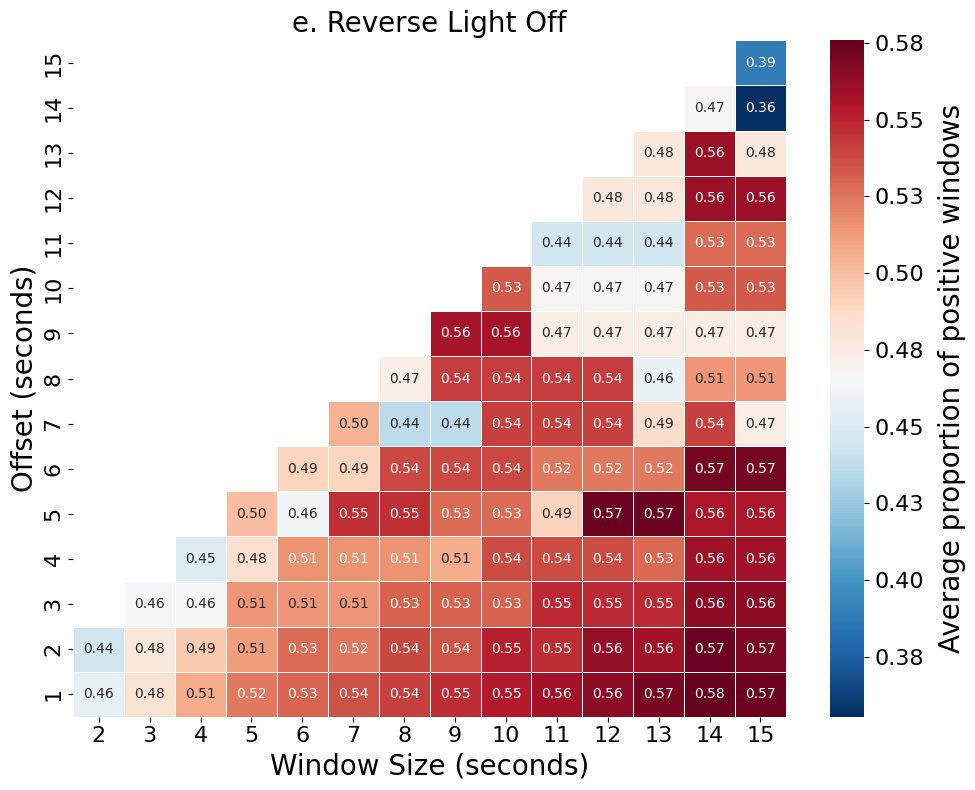

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\3906454008.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


<Figure size 640x480 with 0 Axes>

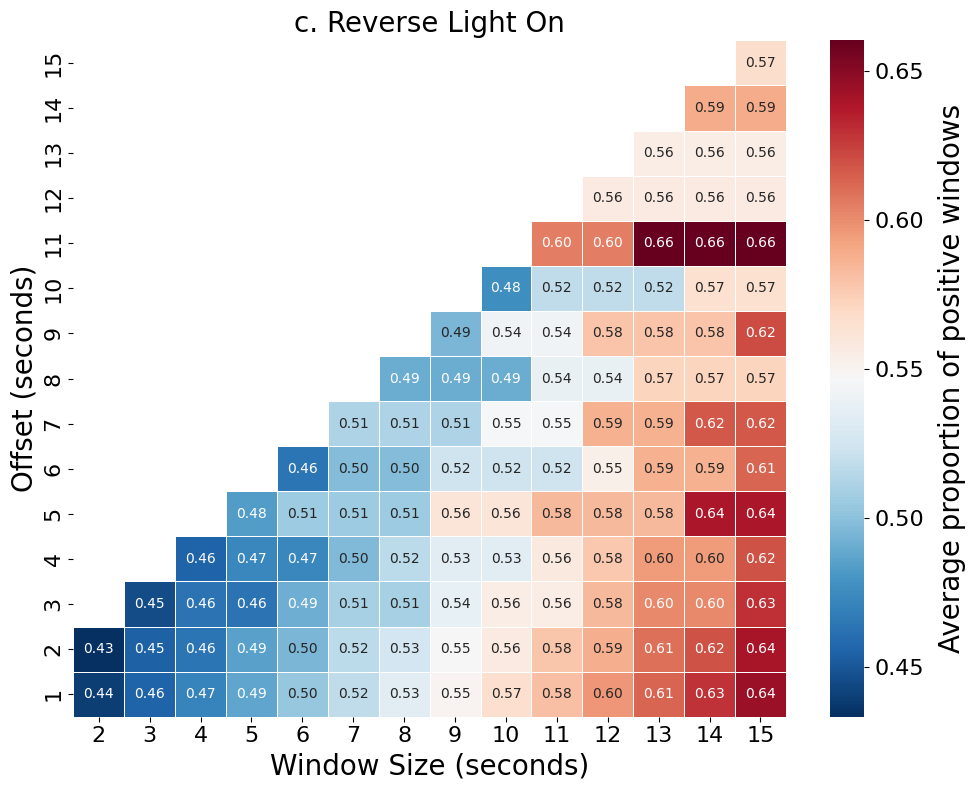

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\3906454008.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


<Figure size 640x480 with 0 Axes>

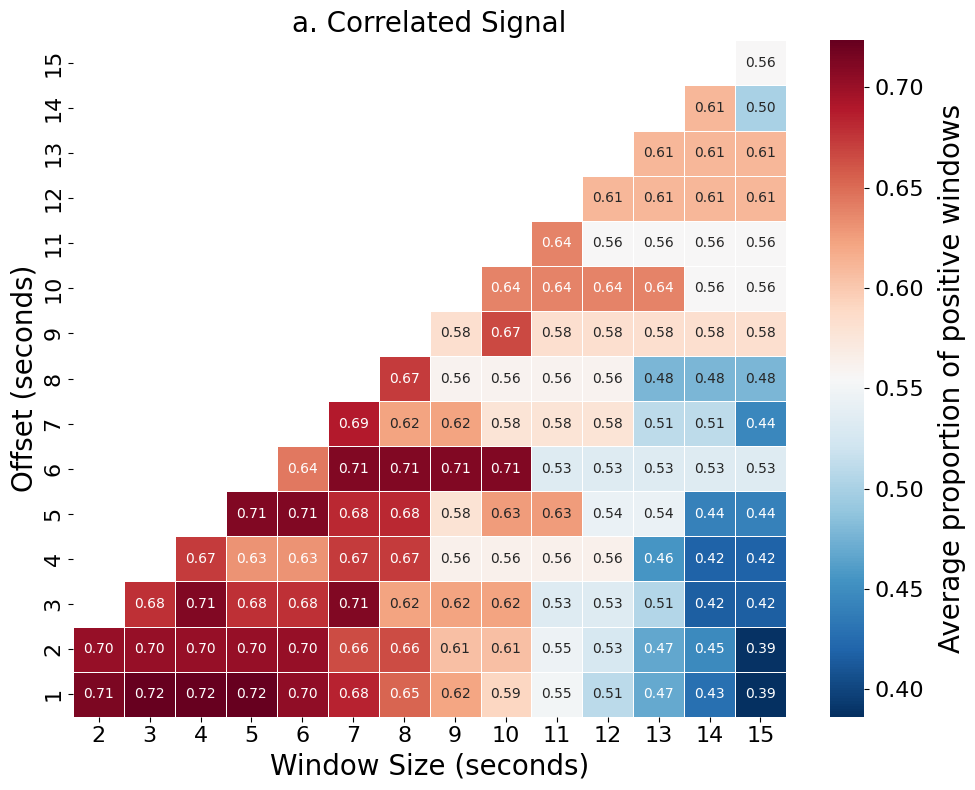

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\3906454008.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


<Figure size 640x480 with 0 Axes>

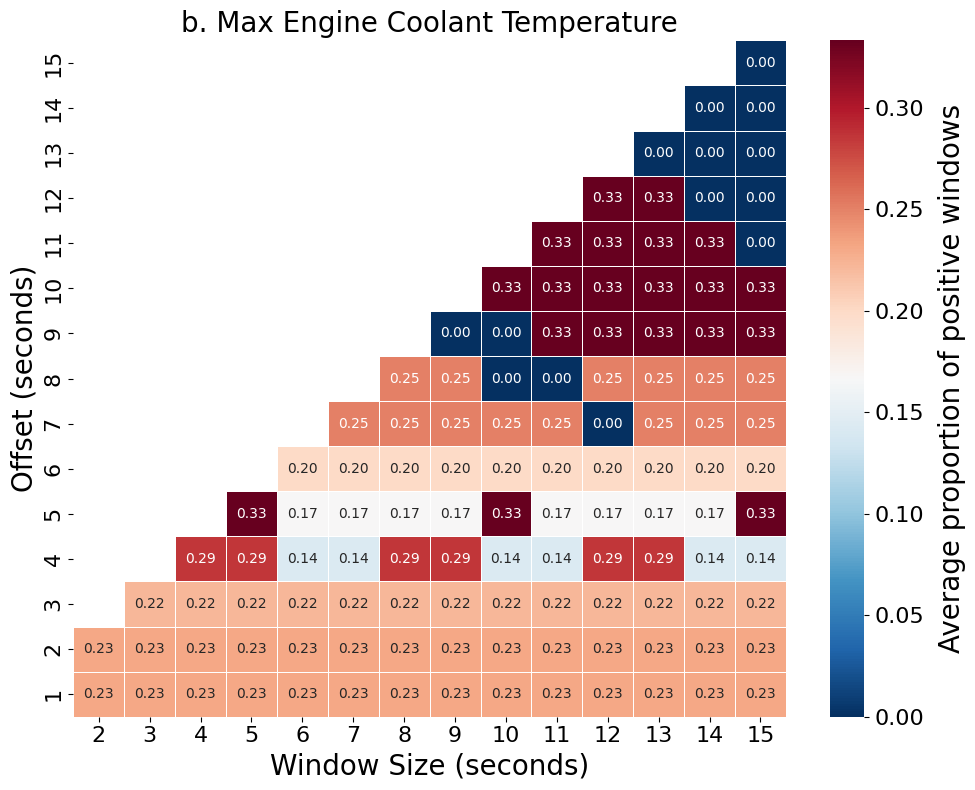

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\3906454008.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


<Figure size 640x480 with 0 Axes>

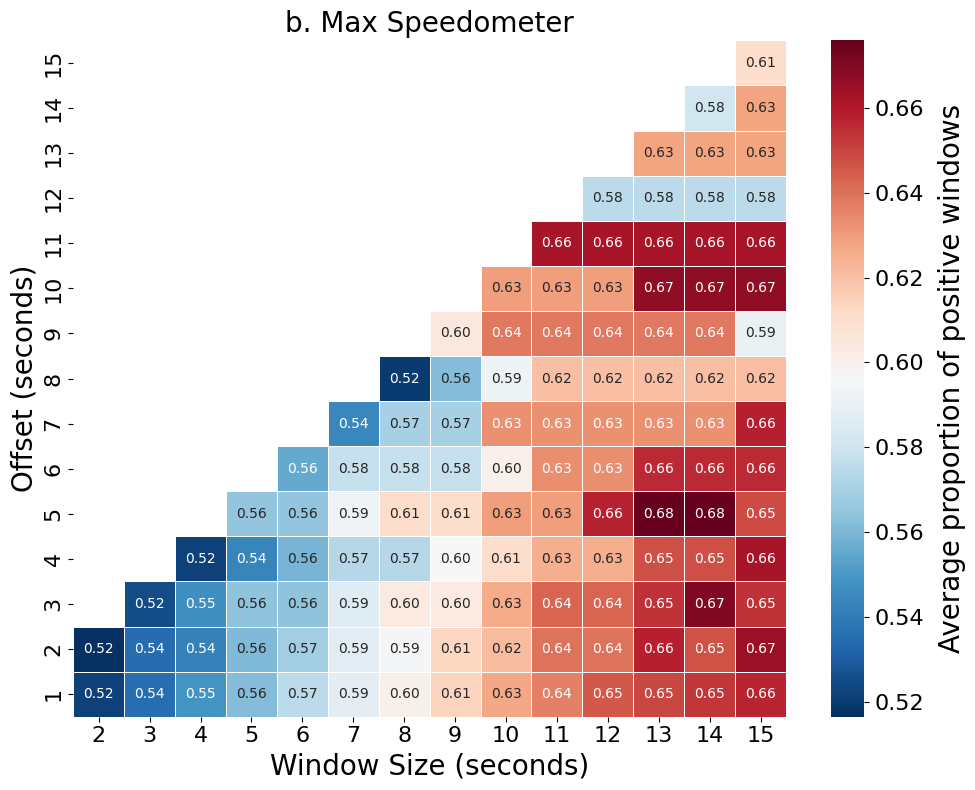

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\3906454008.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


<Figure size 640x480 with 0 Axes>

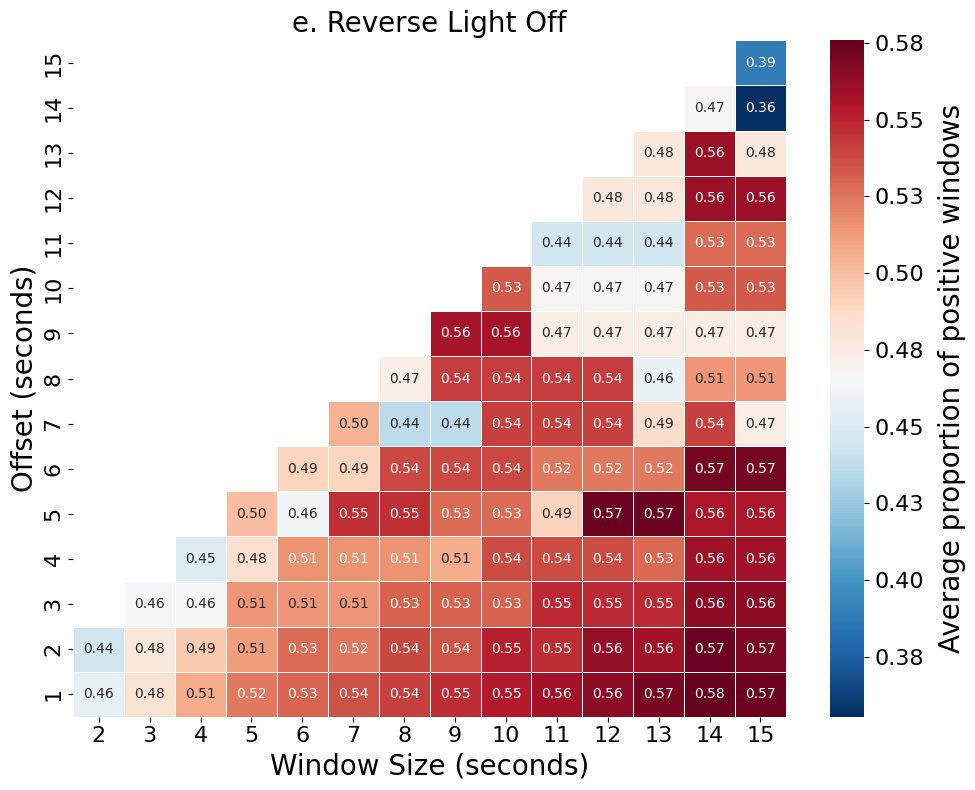

C:\Users\willi\AppData\Local\Temp\ipykernel_32044\3906454008.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])


<Figure size 640x480 with 0 Axes>

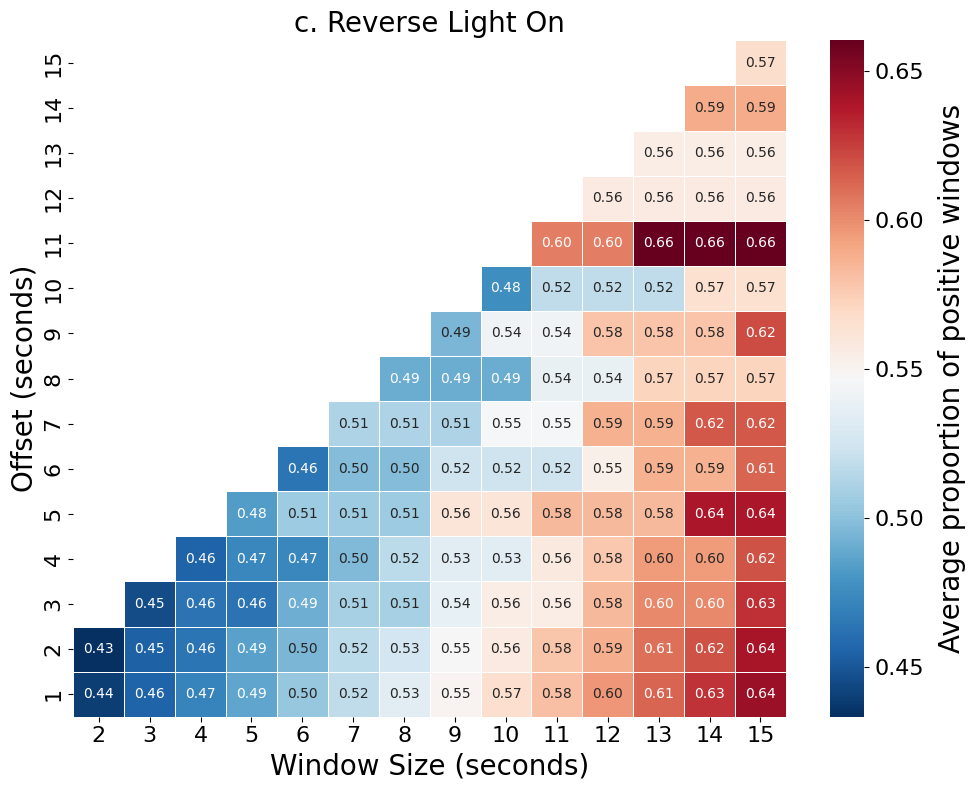

In [14]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set up the save path
save_path = "C:/Users/willi/CAN_experiments/ground_truth_heatmaps/"
os.makedirs(save_path, exist_ok=True)

def create_separate_heatmaps(attack_classes, all_results):
    # Define the labels for the attacks without the word "Attacks"
    attack_labels = {
        'Correlated Signal Attacks': 'a. Correlated Signal',
        'Max Speedometer Attacks': 'b. Max Speedometer',
        'Reverse Light On Attacks': 'c. Reverse Light On',
        'Max Engine Coolant Attacks': 'd. Max Engine Coolant',
        'Reverse Light Off Attacks': 'e. Reverse Light Off',
        # Make sure these keys match what you have in 'attack_classes'
    }

    for i, (class_name, attack_names) in enumerate(attack_classes.items()):
        plt.clf()  # Clear the current figure

        # Get the correct label for the current attack without "Attacks"
        label_for_title = attack_labels.get(class_name, f"{chr(97+i)}. {class_name.replace(' Attacks', '')}")
        label_for_filename = f"{chr(97+i)}_{class_name.replace(' Attacks', '').replace(' ', '_')}"

        # Assume aggregate_proportions and other necessary computations here
        average_data_class = aggregate_proportions(all_results, attack_names)
        df = pd.DataFrame([
            {"Window Size": ws, "Offset": offset, "Average Proportion": avg_prop}
            for (ws, offset), avg_prop in average_data_class.items()
        ])
        pivot_table = df.pivot(index="Offset", columns="Window Size", values="Average Proportion")

        # Plotting code
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(pivot_table, annot=True, cmap='RdBu_r', fmt=".2f", linewidths=.5,
                    cbar_kws={'label': 'Average proportion of positive windows'}, ax=ax)
        ax.set_title(label_for_title, fontsize=20)  # Use the correct label here
        ax.set_xlabel('Window Size (seconds)', fontsize=20)
        ax.set_ylabel('Offset (seconds)', fontsize=20)
        ax.invert_yaxis()

        for label in (ax.get_xticklabels() + ax.get_yticklabels()):
            label.set_fontsize(16)

        cbar = ax.collections[0].colorbar
        cbar.set_label('Average proportion of positive windows', fontsize=20, labelpad=10)
        cbar.ax.tick_params(labelsize=16)
        cbar.set_ticklabels(['{:.2f}'.format(tick) for tick in cbar.get_ticks()])

        plt.tight_layout()
        heatmap_filename = os.path.join(save_path, f"heatmap_{label_for_filename}.png")
        plt.savefig(heatmap_filename, dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

# Ensure 'attack_classes' and 'all_results' are defined and populated with data before calling
if 'attack_classes' in globals() and 'all_results' in globals():
    create_separate_heatmaps(attack_classes, all_results)
else:
    print("Required data is not available.")

# Ensure 'attack_classes' and 'all_results' are defined and populated with data before calling
if 'attack_classes' in globals() and 'all_results' in globals():
    create_separate_heatmaps(attack_classes, all_results)
else:
    print("Required data is not available.")
